In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from rdkit import Chem

def process_smiles_csv(filepath):
    """
    Process the SMILES CSV file with specific columns for SMILES, pIC50, num_atoms, and logP.
    Handles the RDKit mol object information appropriately.
    
    Parameters:
    filepath (str): Path to the CSV file
    
    Returns:
    pd.DataFrame: Clean DataFrame with properly structured columns
    """
    # Read the CSV file, skipping the RDKit mol object column
    df = pd.read_csv(filepath, usecols=[0, 1, 3, 4], names=['SMILES', 'pIC50', 'num_atoms', 'logP'], skiprows=1)
    
    # Create RDKit mol objects from SMILES
    df['mol_object'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
    
    # Ensure numeric columns are properly typed
    df['pIC50'] = pd.to_numeric(df['pIC50'], errors='coerce')
    df['num_atoms'] = pd.to_numeric(df['num_atoms'], errors='coerce')
    df['logP'] = pd.to_numeric(df['logP'], errors='coerce')
    
    return df

# Example usage:
df = process_smiles_csv('smiles.csv')
print("\nFirst few rows of the processed DataFrame:")
print(df.head())

print("\nDataFrame Info:")
print(df.info())
df.to_csv('chemical_data.csv')


First few rows of the processed DataFrame:
                                              SMILES  pIC50  num_atoms  \
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1   4.26         25   
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...   4.34         36   
2             NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO   4.53         23   
3                NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21   4.56         22   
4                  CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1   4.59         21   

     logP                                        mol_object  
0  4.1591  <rdkit.Chem.rdchem.Mol object at 0x70b4024c9cb0>  
1  3.6743  <rdkit.Chem.rdchem.Mol object at 0x70b4024c9d20>  
2  1.5361  <rdkit.Chem.rdchem.Mol object at 0x70b4024c9d90>  
3  0.9510  <rdkit.Chem.rdchem.Mol object at 0x70b4024c9e00>  
4  3.2130  <rdkit.Chem.rdchem.Mol object at 0x70b4024c9e70>  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Data columns (total 5 columns):
 #   Column   

In [6]:
df = pd.read_csv('chemical_data.csv')
df.head()

,Unnamed: 0,SMILES,pIC50,num_atoms,logP,mol_object
0,0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,25,4.1591,<rdkit.Chem.rdchem.Mol object at 0x70b4024c9cb0>
1,1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,36,3.6743,<rdkit.Chem.rdchem.Mol object at 0x70b4024c9d20>
2,2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,23,1.5361,<rdkit.Chem.rdchem.Mol object at 0x70b4024c9d90>
3,3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,22,0.9510,<rdkit.Chem.rdchem.Mol object at 0x70b4024c9e00>
4,4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,21,3.2130,<rdkit.Chem.rdchem.Mol object at 0x70b4024c9e70>


In [28]:
import pandas as pd
from rdkit import Chem

def process_smiles_csv(filepath):
    """
    Process the SMILES CSV file and organize columns in the specified order:
    SMILES, pIC50, mol, num_atoms, logP
    
    Parameters:
    filepath (str): Path to the CSV file
    
    Returns:
    pd.DataFrame: Clean DataFrame with properly ordered columns
    """
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Clean up column names by removing 'Unnamed: 0' if present
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    # Create RDKit mol objects from SMILES
    df['mol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
    
    # Ensure numeric columns are properly typed
    df['pIC50'] = pd.to_numeric(df['pIC50'], errors='coerce')
    df['num_atoms'] = pd.to_numeric(df['num_atoms'], errors='coerce')
    df['logP'] = pd.to_numeric(df['logP'], errors='coerce')
    
    # Reorder columns as specified
    df = df[['SMILES', 'pIC50', 'mol', 'num_atoms', 'logP']]
    df = df.drop(columns=['mol'])
    df['SMILES'] = df['SMILES'].astype(str)
    
    return df

# Example usage:
df = process_smiles_csv('smiles.csv')
print("\nFirst few rows of the processed DataFrame:")
print(df.head())

print("\nColumn order verification:")
print(df.columns.tolist())
df.to_csv('chemical_data3.csv')


First few rows of the processed DataFrame:
                                              SMILES  pIC50  num_atoms    logP
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1   4.26         25  4.1591
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...   4.34         36  3.6743
2             NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO   4.53         23  1.5361
3                NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21   4.56         22  0.9510
4                  CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1   4.59         21  3.2130

Column order verification:
['SMILES', 'pIC50', 'num_atoms', 'logP']


In [ ]:
from rdkit import Chem
df = pd.read_csv('chemical_data2.csv')
df['SMILES'] = df['SMILES'].astype(str)
# Apply Chem.MolFromSmiles to each SMILES string in the DataFrame
df['Mol'] = df['SMILES'].apply(Chem.MolFromSmiles)

# Convert back to SMILES format
df['Reverted_SMILES'] = df['Mol'].apply(Chem.MolToSmiles)

print(df[['SMILES', 'Reverted_SMILES']].head())

                                              SMILES  \
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1   
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...   
2             NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO   
3                NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21   
4                  CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1   

                                     Reverted_SMILES  
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1  
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...  
2             NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO  
3                NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21  
4                  CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1  


In [26]:
smile_string = df['Reverted_SMILES'][4] #SMILE string
print('Smile string', smile_string)
mol = Chem.MolFromSmiles(smile_string) #mol object from SMILE string
print('mol object', mol)
normal_string = Chem.MolToSmiles(mol) #converting the mol object to SMILES str
print('converted the mol object back to SMILE str', normal_string)


Smile string CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1
mol object <rdkit.Chem.rdchem.Mol object at 0x70b3d6f5aea0>
converted the mol object back to SMILE str CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1


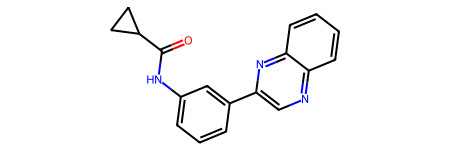

In [36]:
df3 = pd.read_csv('chemical_data3.csv')
mol = Chem.MolFromSmiles(df3['SMILES'][5])
mol

In [37]:
df3.dtypes

SMILES        object
pIC50        float64
num_atoms      int64
logP         float64
dtype: object

In [19]:
import pandas as pd
from rdkit import Chem

# Read the CSV file with proper parsing
df = pd.read_csv('smiles.csv')

# Show the structure of our data
print("Original columns in the dataset:")
print(df.columns.tolist())

print("\nFirst few rows of the processed data:")
print(df.head())

# Convert SMILES strings to RDKit molecules
df['mol'] = df['SMILES'].apply(Chem.MolFromSmiles)

print("\nDataset after converting SMILES to molecules:")
print("Number of molecules:", len(df))
print("\nColumns and their first values:")
for column in df.columns:
    print(f"{column}: {df[column].iloc[0]}")

Original columns in the dataset:
['SMILES', 'pIC50', 'mol', 'num_atoms', 'logP']

First few rows of the processed data:
                                              SMILES  pIC50  \
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1   4.26   
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...   4.34   
2             NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO   4.53   
3                NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21   4.56   
4                  CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1   4.59   

                                                mol  num_atoms    logP  
0  <rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>         25  4.1591  
1  <rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>         36  3.6743  
2  <rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>         23  1.5361  
3  <rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>         22  0.9510  
4  <rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>         21  3.2130  

Dataset after converting SMILES to molecules:
Number of molecu


Molecular Property Explanations:
1. pIC50: Measure of binding affinity (higher means more potent)
2. Molecular Weight: Size of the molecule (important for drug-likeness)
3. LogP: Measure of fat solubility (affects how drug moves through body)
4. Polar Surface Area: Area of all polar atoms (affects absorption)
5. H-Bond Donors/Acceptors: Ability to form hydrogen bonds (important for binding)
6. Rotatable Bonds: Flexibility of the molecule
7. Ring Count: Number of rings in structure (affects drug-likeness)

Reading the dataset...
Converting SMILES to molecular structures...
Calculating molecular properties...

Basic Statistical Analysis:

Summary Statistics:
              pIC50  molecular_weight          logP  polar_surface_area  \
count  15037.000000      16087.000000  16087.000000        16087.000000   
mean       0.998739        273.556648      2.256600           63.872325   
std        2.479588        119.422908      1.609861           39.155225   
min        0.000000         40.031

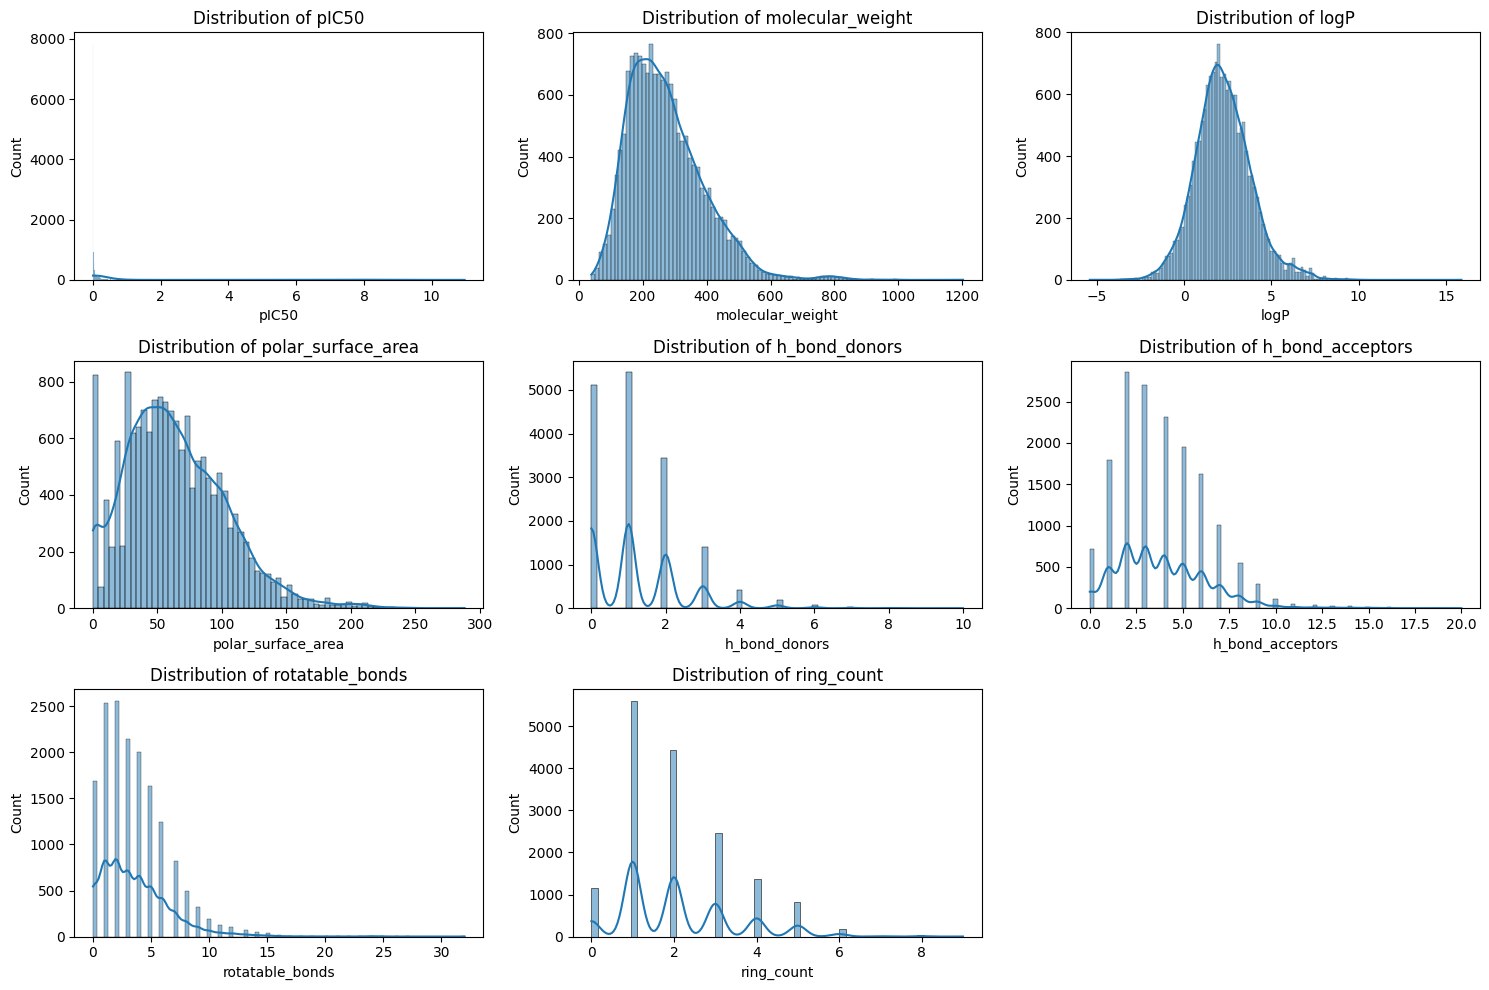


Calculating correlations with pIC50...
molecular_weight: 0.477
logP: 0.172
polar_surface_area: 0.418
h_bond_donors: 0.330
h_bond_acceptors: 0.447
rotatable_bonds: 0.209
ring_count: 0.574


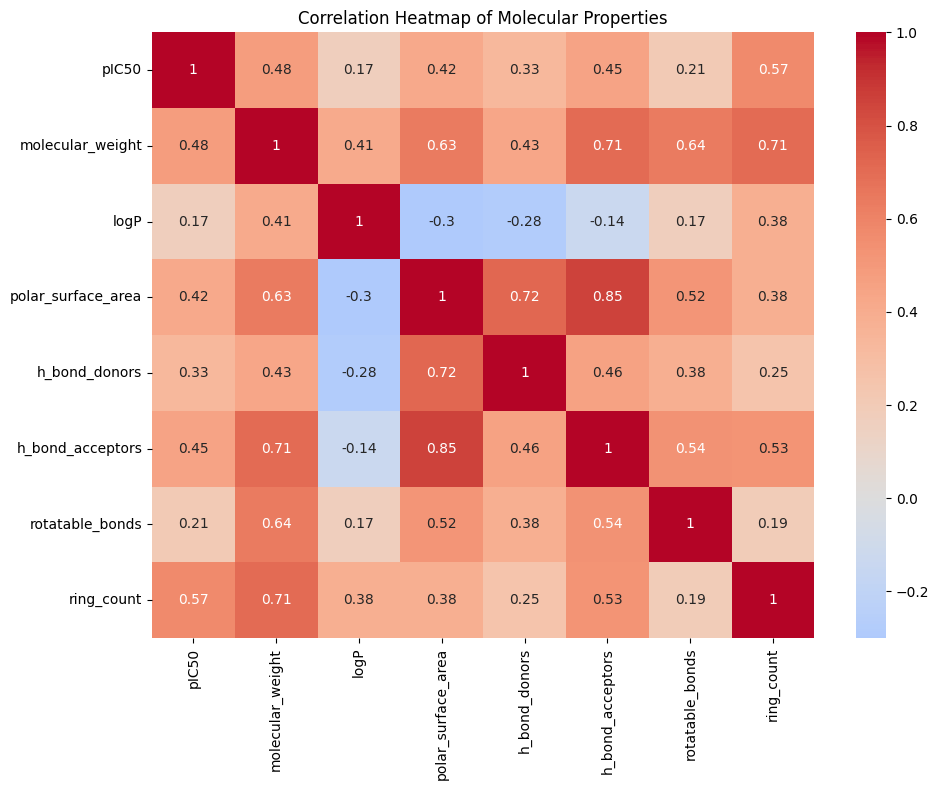


Displaying example molecules...

Molecule 1:
SMILES: O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1
pIC50: 4.26
Molecular Weight: 367.04
LogP: 4.16
Polar Surface Area: 71.95


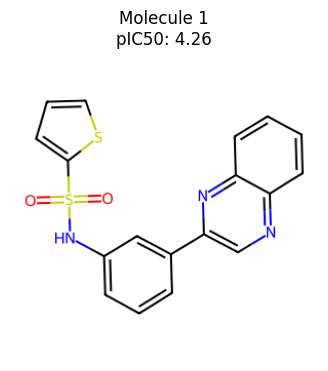


Molecule 2:
SMILES: O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)[nH]c2-c2ccc(F)cc2)cc[nH]1
pIC50: 4.34
Molecular Weight: 506.13
LogP: 3.67
Polar Surface Area: 149.78


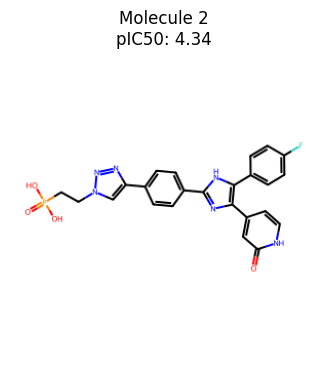


Molecule 3:
SMILES: NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO
pIC50: 4.53
Molecular Weight: 317.17
LogP: 1.54
Polar Surface Area: 101.37


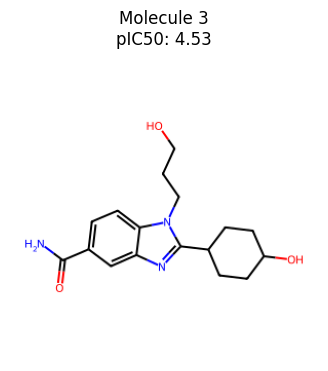

In [13]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import matplotlib.pyplot as plt
import seaborn as sns

def create_molecular_dataset(file_path):
    """
    Creates a clean DataFrame from molecular data and calculates important chemical properties.
    This function serves as the foundation for our exploratory data analysis.
    """
    # Read the CSV file
    print("Reading the dataset...")
    df = pd.read_csv(file_path)
    
    # Step 1: Create fresh RDKit molecules from SMILES
    print("Converting SMILES to molecular structures...")
    df['mol'] = df['SMILES'].apply(Chem.MolFromSmiles)
    
    # Step 2: Calculate additional molecular descriptors
    print("Calculating molecular properties...")
    
    # Molecular Weight - helps understand the size of molecules
    df['molecular_weight'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
    
    # Polar Surface Area - important for drug absorption
    df['polar_surface_area'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
    
    # Number of Hydrogen Bond Donors - affects binding properties
    df['h_bond_donors'] = df['mol'].apply(lambda x: Descriptors.NumHDonors(x))
    
    # Number of Hydrogen Bond Acceptors - also affects binding
    df['h_bond_acceptors'] = df['mol'].apply(lambda x: Descriptors.NumHAcceptors(x))
    
    # Number of Rotatable Bonds - indicates molecular flexibility
    df['rotatable_bonds'] = df['mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))
    
    # Ring Count - structural feature important for drug-likeness
    df['ring_count'] = df['mol'].apply(lambda x: Descriptors.RingCount(x))
    
    # Step 3: Basic statistical analysis
    print("\nBasic Statistical Analysis:")
    numerical_columns = ['pIC50', 'molecular_weight', 'logP', 'polar_surface_area', 
                        'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds', 'ring_count']
    
    print("\nSummary Statistics:")
    print(df[numerical_columns].describe())
    
    # Step 4: Visualize distributions
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    
    # Step 5: Correlation analysis
    print("\nCalculating correlations with pIC50...")
    correlations = {}
    for col in numerical_columns[1:]:  # Exclude pIC50 itself
        correlation = df['pIC50'].corr(df[col])
        correlations[col] = correlation
        print(f"{col}: {correlation:.3f}")
    
    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Molecular Properties')
    plt.tight_layout()
    plt.show()
    
    # Step 6: Display example molecules with their properties
    print("\nDisplaying example molecules...")
    n_examples = min(3, len(df))
    for i in range(n_examples):
        mol = df['mol'].iloc[i]
        print(f"\nMolecule {i+1}:")
        print(f"SMILES: {df['SMILES'].iloc[i]}")
        print(f"pIC50: {df['pIC50'].iloc[i]:.2f}")
        print(f"Molecular Weight: {df['molecular_weight'].iloc[i]:.2f}")
        print(f"LogP: {df['logP'].iloc[i]:.2f}")
        print(f"Polar Surface Area: {df['polar_surface_area'].iloc[i]:.2f}")
        
        # Draw the molecule
        img = Draw.MolToImage(mol)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Molecule {i+1}\npIC50: {df["pIC50"].iloc[i]:.2f}')
        plt.show()
    
    return df

# Let's break down what these properties mean:
print("""
Molecular Property Explanations:
1. pIC50: Measure of binding affinity (higher means more potent)
2. Molecular Weight: Size of the molecule (important for drug-likeness)
3. LogP: Measure of fat solubility (affects how drug moves through body)
4. Polar Surface Area: Area of all polar atoms (affects absorption)
5. H-Bond Donors/Acceptors: Ability to form hydrogen bonds (important for binding)
6. Rotatable Bonds: Flexibility of the molecule
7. Ring Count: Number of rings in structure (affects drug-likeness)
""")

# Use the function
molecular_df = create_molecular_dataset('smiles.csv')
molecular_df.to_csv('enhanced_data.csv')

In [28]:
molecular_df['SMILES'][7]

'COc1cc(Nc2nccc(-c3ccc(Cl)cc3)n2)cc(OC)c1OC'

In [1]:
import os, sys
from dataclasses import dataclass
from pathlib import Path
import pandas as pd
from typing import Tuple
import psycopg2
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
import logging



# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler(sys.stdout)]
)

@dataclass
class DataIngestionConfig:
    current_dir = os.getcwd()
    data_artifacts_dir = os.path.join(current_dir, "Data")
    data_path: str = os.path.join(data_artifacts_dir, "Dataset.csv")
    
class ChemicalDataIngestion:
    def __init__(self):
        self.ingestion_config = DataIngestionConfig()
        #DataBase connecion parameters
        self.db_params = {
            'database': 'mlchem',
            'user': os.getenv('DB_USER', 'postgres'),
            'password': os.getenv('DB_PASSWORD', 'admin@123'),
            'host': 'localhost',
            'port': '5432'
        }
    def get_data_from_postgres(self)->pd.DataFrame:
        try:
            encoded_password = "admin%40123" #URL-Encoded version of "admin@123"
             #Construct the database connection string
            connection_string = f"postgresql+psycopg2://{self.db_params['user']}:{encoded_password}@{self.db_params['host']}:{self.db_params['port']}/{self.db_params['database']}"
        
        # Create SQLAlchemy engine
            engine = create_engine(connection_string)
        
        # Fetch data
            query = "SELECT * FROM public.chem_db"
            logging.info("Fetching data from PostgreSQL database...")
            df = pd.read_sql(query, engine)
        
            if df.empty:
                raise ValueError("No data retrieved from database")
            
            logging.info(f"Successfully retrieved {len(df)} records from database")
            return df
        except Exception as e:
            logging.error(f"Error fetching data from PostgreSQL: {str(e)}")
            raise e
        finally:
            if 'engine' in locals():
                engine.dispose()
    def initiate_data_ingestion(self) -> Tuple[str]:
        try:
            os.makedirs(self.ingestion_config.data_artifacts_dir, exist_ok=True)
            
            # Fetch data
            df = self.get_data_from_postgres()
            if df is None or df.empty:
                logging.error("No data available for ingestion. Exiting.")
                raise ValueError("No data available for ingestion.")
            else:
                #Save raw data
                logging.info("Fetching data from DataBase...")
                df.to_csv(self.ingestion_config.data_path, index=False)
                logging.info(df.head(5))
            
            logging.info("Data ingestion completed successfully")
            return self.ingestion_config.data_path
        
        except Exception as e:
            logging.error(f"Error in data ingestion: {str(e)}")
            raise e


if __name__ == "__main__":
    ingestion = ChemicalDataIngestion()
    data = ingestion.initiate_data_ingestion()
    print(data)
    

2025-01-13 09:10:28,554 - INFO - Fetching data from PostgreSQL database...
2025-01-13 09:10:28,608 - INFO - Successfully retrieved 16087 records from database
2025-01-13 09:10:28,609 - INFO - Fetching data from DataBase...
2025-01-13 09:10:28,640 - INFO -                                               SMILES  pIC50  num_atoms    logP
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1   4.26         25  4.1591
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...   4.34         36  3.6743
2             NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO   4.53         23  1.5361
3                NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21   4.56         22  0.9510
4                  CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1   4.59         21  3.2130
2025-01-13 09:10:28,643 - INFO - Data ingestion completed successfully
/home/kenzi/molecular prediction mlops/Data/Dataset.csv


In [3]:
chemical_df = pd.read_csv('Data/Dataset.csv')
chemical_df

,SMILES,pIC50,num_atoms,logP
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,25,4.15910
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,36,3.67430
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,23,1.53610
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,22,0.95100
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,21,3.21300
...,...,...,...,...
16082,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,0.00,24,3.21560
16083,S=C=NCCCCCCCCCCc1ccccc1,0.00,19,5.45270
16084,S=C=NCCCCCCCCc1ccccc1,0.00,17,4.67250
16085,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,0.00,22,3.93289


In [4]:
# The SMILES strings are normal string we need to convert it
# back to Mol format
from rdkit import Chem
chemical_df['Mol']=chemical_df['SMILES'].apply(Chem.MolFromSmiles)
chemical_df['Reverted_SMILES']=chemical_df['Mol'].apply(Chem.MolToSmiles)
print('======================================================')
print(chemical_df.head(5))

                                              SMILES  pIC50  num_atoms  \
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1   4.26         25   
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...   4.34         36   
2             NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO   4.53         23   
3                NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21   4.56         22   
4                  CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1   4.59         21   

     logP                                               Mol  \
0  4.1591  <rdkit.Chem.rdchem.Mol object at 0x7603501f78b0>   
1  3.6743  <rdkit.Chem.rdchem.Mol object at 0x7603501f5460>   
2  1.5361  <rdkit.Chem.rdchem.Mol object at 0x7603501f7760>   
3  0.9510  <rdkit.Chem.rdchem.Mol object at 0x7603501f77d0>   
4  3.2130  <rdkit.Chem.rdchem.Mol object at 0x7603501f7840>   

                                     Reverted_SMILES  
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1  
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...  
2          

In [5]:
chemical_df = chemical_df.drop(columns=['SMILES'])
chemical_df

,pIC50,num_atoms,logP,Mol,Reverted_SMILES
0,4.26,25,4.15910,<rdkit.Chem.rdchem.Mol object at 0x7603501f78b0>,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1
1,4.34,36,3.67430,<rdkit.Chem.rdchem.Mol object at 0x7603501f5460>,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...
2,4.53,23,1.53610,<rdkit.Chem.rdchem.Mol object at 0x7603501f7760>,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO
3,4.56,22,0.95100,<rdkit.Chem.rdchem.Mol object at 0x7603501f77d0>,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21
4,4.59,21,3.21300,<rdkit.Chem.rdchem.Mol object at 0x7603501f7840>,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1
...,...,...,...,...,...
16082,0.00,24,3.21560,<rdkit.Chem.rdchem.Mol object at 0x7603407d7140>,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1
16083,0.00,19,5.45270,<rdkit.Chem.rdchem.Mol object at 0x7603407d71b0>,S=C=NCCCCCCCCCCc1ccccc1
16084,0.00,17,4.67250,<rdkit.Chem.rdchem.Mol object at 0x7603407d7220>,S=C=NCCCCCCCCc1ccccc1
16085,0.00,22,3.93289,<rdkit.Chem.rdchem.Mol object at 0x7603407d7290>,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1


In [6]:
from rdkit.Chem import Descriptors, Draw
from rdkit.Chem.GraphDescriptors import BertzCT
from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import CalcLabuteASA

print('calculating molecular properties')

#molecular weight helps us understand the size of molecules
chemical_df['molecular_weight'] = chemical_df['Mol'].apply(lambda x: Descriptors.ExactMolWt(x))

#polar surface area is important for drug absorption
chemical_df['polar_surface_area'] = chemical_df['Mol'].apply(lambda x: Descriptors.TPSA(x))

# No. of hydrogen bond donors affects the binding affinity properties
chemical_df['h_bond_donors'] = chemical_df['Mol'].apply(lambda x: Descriptors.NumHDonors(x))

# No. of hydrogen bond acceptors also affects the binding affinity properties
chemical_df['h_bond_acceptors'] = chemical_df['Mol'].apply(lambda x: Descriptors.NumHAcceptors(x))

# Number of rotatable bonds indicates molecular flexibility
chemical_df['rotatable_bonds'] = chemical_df['Mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))

# Ring count is a structural feature important for drug-likeness
chemical_df['ring_count'] = chemical_df['Mol'].apply(lambda x: Descriptors.RingCount(x))

#No. of aromatic rings(Molecular Aromaticity) affects the affinity
chemical_df['aromatic_rings'] = chemical_df['Mol'].apply(lambda mol: sum(1 for ring in Chem.GetSymmSSSR(mol) if all(mol.GetAtomWithIdx(idx).GetIsAromatic() for idx in ring)))

# LogS affects the drug's ability to dissolve in biological fluids
chemical_df['logS'] = chemical_df['Mol'].apply(lambda x: -Descriptors.MolLogP(x))

# Electrostatic potential represents charge distribution on the molecule
# The charged regions often interact with specific amino acid residues in proteins
# Electrostatic Potential: Approximate by computing Gasteiger Charges
chemical_df['electrostatic_potential'] = chemical_df['Mol'].apply(lambda x: sum([a.GetDoubleProp('_GasteigerCharge')for a in AllChem.ComputeGasteigerCharges(x) or x.GetAtoms()]))

# Shape index quantifies molecular shape and compactness that determines 
# how well the molecule fits into a binding pocket
# Shape Index: Approximated using descriptors like BertzCT
chemical_df['shape_index'] = chemical_df['Mol'].apply(lambda x: BertzCT(x))

#Isotropic and Anisotropic Surface Areas(requires 3D structures) explains hydrophobic and hydrophilic interaction balance.
chemical_df['surface_area'] = chemical_df['Mol'].apply(lambda x: CalcLabuteASA(x))
chemical_df

calculating molecular properties


,pIC50,num_atoms,logP,Mol,Reverted_SMILES,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area
0,4.26,25,4.15910,<rdkit.Chem.rdchem.Mol object at 0x7603501f78b0>,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,367.044919,71.95,1,5,4,4,4,-4.15910,-0.977179,1139.934665,148.617553
1,4.34,36,3.67430,<rdkit.Chem.rdchem.Mol object at 0x7603501f5460>,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,506.126768,149.78,4,6,7,5,5,-3.67430,-1.777001,1619.638689,203.211921
2,4.53,23,1.53610,<rdkit.Chem.rdchem.Mol object at 0x7603501f7760>,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,317.173942,101.37,3,5,5,3,2,-1.53610,-1.532649,702.416659,134.485318
3,4.56,22,0.95100,<rdkit.Chem.rdchem.Mol object at 0x7603501f77d0>,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,301.190260,98.96,3,5,5,3,2,-0.95100,-1.440147,672.471157,129.421661
4,4.59,21,3.21300,<rdkit.Chem.rdchem.Mol object at 0x7603501f7840>,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,294.093917,49.84,2,3,2,3,3,-3.21300,-1.062501,800.893785,127.797847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16082,0.00,24,3.21560,<rdkit.Chem.rdchem.Mol object at 0x7603407d7140>,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,333.104816,62.20,2,4,4,3,3,-3.21560,-1.227328,778.302449,145.038735
16083,0.00,19,5.45270,<rdkit.Chem.rdchem.Mol object at 0x7603407d71b0>,S=C=NCCCCCCCCCCc1ccccc1,275.170771,12.36,0,2,11,1,1,-5.45270,-0.910911,354.784631,122.699869
16084,0.00,17,4.67250,<rdkit.Chem.rdchem.Mol object at 0x7603407d7220>,S=C=NCCCCCCCCc1ccccc1,247.139471,12.36,0,2,9,1,1,-4.67250,-0.804299,328.034873,109.969985
16085,0.00,22,3.93289,<rdkit.Chem.rdchem.Mol object at 0x7603407d7290>,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,306.093917,38.54,1,4,3,4,4,-3.93289,-1.023548,978.497515,132.196992


we can add more properties which hinders the affinity

In [6]:
"""Basic Statistical analysis"""
numerical_cols = ['pIC50', 'num_atoms', 'logP', 'molecular_weight', 'polar_surface_area',
       'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds', 'ring_count',
       'aromatic_rings', 'logS', 'electrostatic_potential', 'shape_index',
       'surface_area']
print("\nSummary statistics:")
print(chemical_df[numerical_cols].describe())


Summary statistics:
              pIC50     num_atoms          logP  molecular_weight  \
count  15037.000000  16087.000000  16087.000000      16087.000000   
mean       0.998739     18.749984      2.256600        273.556648   
std        2.479588      8.428888      1.609861        119.422908   
min        0.000000      3.000000     -5.395600         40.031300   
25%        0.000000     13.000000      1.214900        185.984840   
50%        0.010000     17.000000      2.163200        254.996617   
75%        0.130000     23.000000      3.232440        340.113550   
max       10.970000     85.000000     15.879200       1201.841368   

       polar_surface_area  h_bond_donors  h_bond_acceptors  rotatable_bonds  \
count        16087.000000   16087.000000      16087.000000     16087.000000   
mean            63.872325       1.233543          3.845963         3.633866   
std             39.155225       1.210361          2.422930         3.005584   
min              0.000000       0.000000 

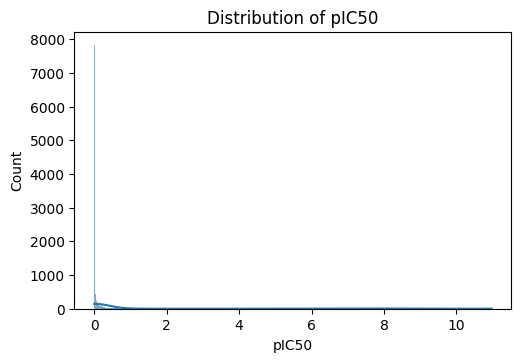

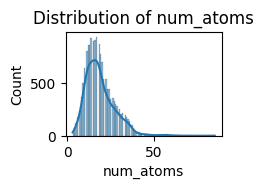

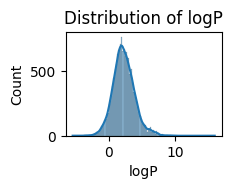

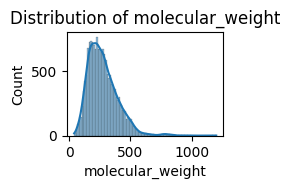

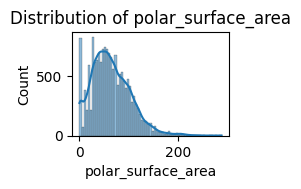

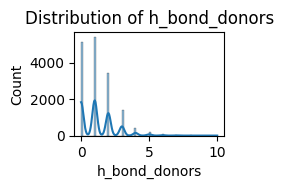

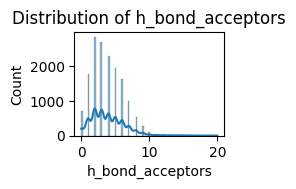

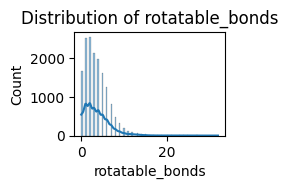

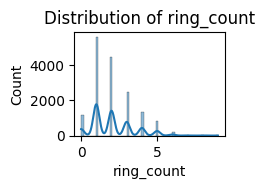

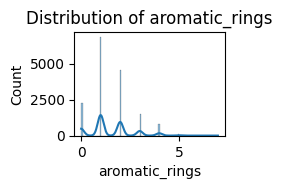

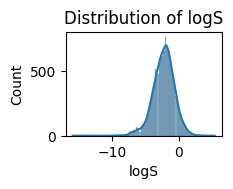

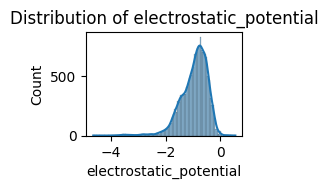

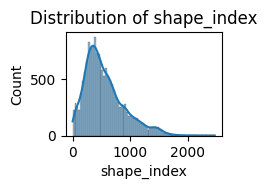

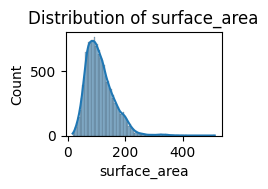

In [7]:
"""Visualize distributions"""
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols,1):
    plt.subplot(3,3,3)
    sns.histplot(chemical_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [8]:
"""Correlation analysis"""
print("\nCalculating correlations with pIC50...")
correlations = {}
for col in numerical_cols[1:]:  # Exclude pIC50 itself
    correlation = chemical_df['pIC50'].corr(chemical_df[col])
    correlations[col] = correlation
    print(f"{col}: {correlation:.3f}")


Calculating correlations with pIC50...
num_atoms: 0.515
logP: 0.172
molecular_weight: 0.477
polar_surface_area: 0.418
h_bond_donors: 0.330
h_bond_acceptors: 0.447
rotatable_bonds: 0.209
ring_count: 0.574
aromatic_rings: 0.537
logS: -0.172
electrostatic_potential: -0.410
shape_index: 0.613
surface_area: 0.493


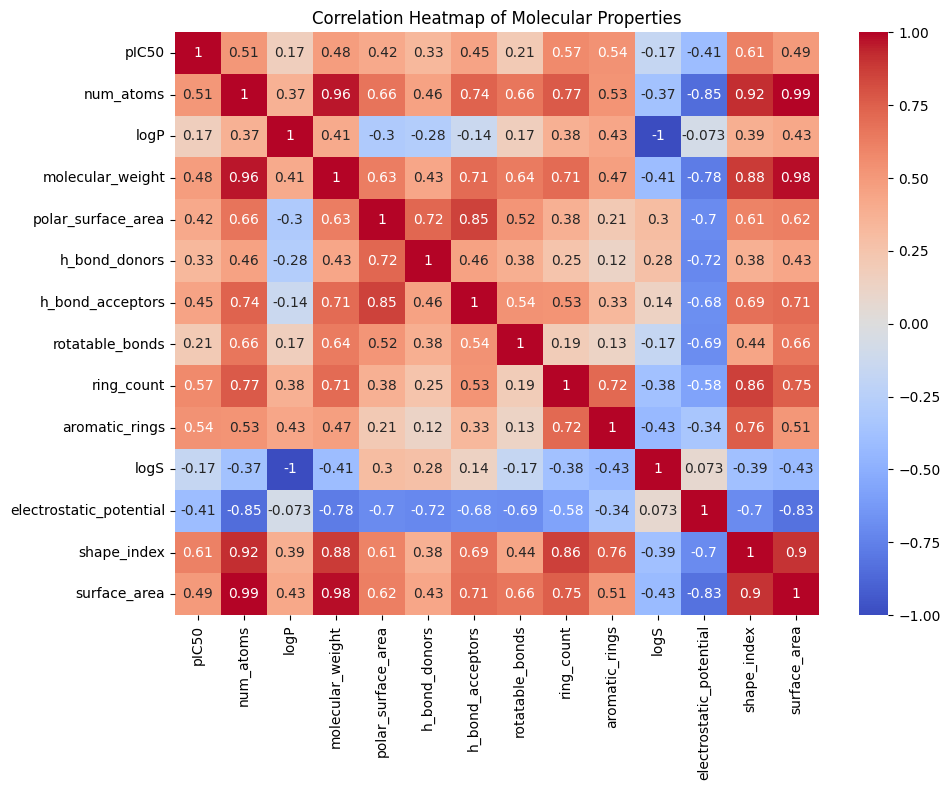

In [9]:
"""correlation heatmap"""
plt.figure(figsize=(10, 8))
correlation_matrix = chemical_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Molecular Properties')
plt.tight_layout()
plt.show()

Displaing example molecules

Molecule 1:
SMILES: O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1
pIC50: 4.26
Molecular Weight: 367.04 g/mol
LogP: 4.16
Polar Surface Area: 71.95 Å²
Hydrogen bond donors: 1
Hydrogen bond acceptors: 5
Rotatable bonds: 4
Ring count: 4
Aromatic rings: 4
LogS: -4.16 log(mol/L)
Electrostatic potential: -0.98  # Units vary depending on calculation method
Shape index: 1139.93
Surface area: 148.62 Å²


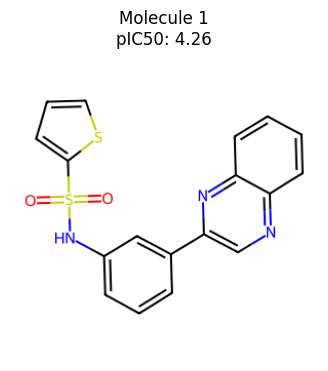


Molecule 2:
SMILES: O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)[nH]c2-c2ccc(F)cc2)cc[nH]1
pIC50: 4.34
Molecular Weight: 506.13 g/mol
LogP: 3.67
Polar Surface Area: 149.78 Å²
Hydrogen bond donors: 4
Hydrogen bond acceptors: 6
Rotatable bonds: 7
Ring count: 5
Aromatic rings: 5
LogS: -3.67 log(mol/L)
Electrostatic potential: -1.78  # Units vary depending on calculation method
Shape index: 1619.64
Surface area: 203.21 Å²


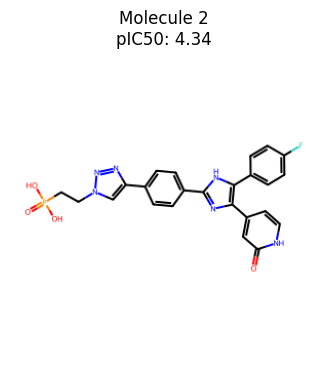


Molecule 3:
SMILES: NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO
pIC50: 4.53
Molecular Weight: 317.17 g/mol
LogP: 1.54
Polar Surface Area: 101.37 Å²
Hydrogen bond donors: 3
Hydrogen bond acceptors: 5
Rotatable bonds: 5
Ring count: 3
Aromatic rings: 2
LogS: -1.54 log(mol/L)
Electrostatic potential: -1.53  # Units vary depending on calculation method
Shape index: 702.42
Surface area: 134.49 Å²


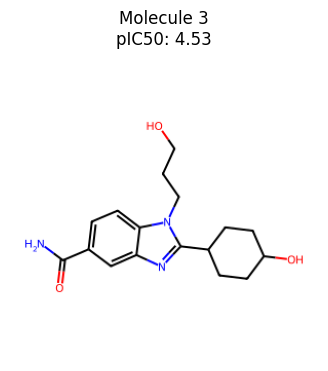

In [10]:
"""Displaying some molecules with their properties"""
print("Displaing example molecules")
n_examples = min(3, len(chemical_df))
for i in range(n_examples):
    mol = chemical_df['Mol'].iloc[i]
    print(f"\nMolecule {i+1}:")
    print(f"SMILES: {chemical_df['Reverted_SMILES'].iloc[i]}")
    print(f"pIC50: {chemical_df['pIC50'].iloc[i]:.2f}") 
    print(f"Molecular Weight: {chemical_df['molecular_weight'].iloc[i]:.2f} g/mol") 
    print(f"LogP: {chemical_df['logP'].iloc[i]:.2f}")  # Unitless (logarithm of partition coefficient)
    print(f"Polar Surface Area: {chemical_df['polar_surface_area'].iloc[i]:.2f} Å²") 
    print(f"Hydrogen bond donors: {chemical_df['h_bond_donors'].iloc[i]}") 
    print(f"Hydrogen bond acceptors: {chemical_df['h_bond_acceptors'].iloc[i]}") 
    print(f"Rotatable bonds: {chemical_df['rotatable_bonds'].iloc[i]}") 
    print(f"Ring count: {chemical_df['ring_count'].iloc[i]}") 
    print(f"Aromatic rings: {chemical_df['aromatic_rings'].iloc[i]}") 
    print(f"LogS: {chemical_df['logS'].iloc[i]:.2f} log(mol/L)")  # Logarithm of molar solubility
    print(f"Electrostatic potential: {chemical_df['electrostatic_potential'].iloc[i]:.2f}  # Units vary depending on calculation method") 
    print(f"Shape index: {chemical_df['shape_index'].iloc[i]:.2f}")  # Unitless
    print(f"Surface area: {chemical_df['surface_area'].iloc[i]:.2f} Å²")

    #Draw the molecule
    img = Draw.MolToImage(mol)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Molecule {i+1}\npIC50: {chemical_df["pIC50"].iloc[i]:.2f}')
    plt.show()

In [1]:
from rdkit import Chem
import pandas as pd
chembl_df = pd.read_csv('/home/kenzi/Downloads/chembl_35_chemreps.txt.gz', sep='\t')
chembl_df = chembl_df[:15000] 
chembl_df.to_csv('Chembl_Dataset.csv')

In [5]:
c = pd.read_csv('Chembl_Dataset.csv')
c.dtypes

Unnamed: 0             int64
chembl_id             object
canonical_smiles      object
standard_inchi        object
standard_inchi_key    object
dtype: object

In [12]:
chembl_df['Mol'] = chembl_df['canonical_smiles'].apply(lambda x: Chem.MolFromSmiles(x) if Chem.MolFromSmiles(x) else None)
chembl_df = chembl_df.drop(columns=['standard_inchi', 'standard_inchi_key'])


[09:12:51] Can't kekulize mol.  Unkekulized atoms: 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77


In [14]:
chembl_df = chembl_df.drop(columns=['chembl_id'])

In [15]:
chembl_df

,canonical_smiles,Mol
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f44a0>
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f5150>
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4e40>
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4f20>
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4350>
...,...,...
14995,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5ee0>
14996,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5f50>
14997,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5fc0>
14998,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d6030>


In [16]:
chembl_df.isnull().sum()

canonical_smiles    0
Mol                 1
dtype: int64

In [17]:
chembl_df = chembl_df.dropna()
chembl_df.isna().sum()

canonical_smiles    0
Mol                 0
dtype: int64

In [18]:
from rdkit.Chem import Descriptors, Draw
from rdkit.Chem.GraphDescriptors import BertzCT
from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import CalcLabuteASA

print('calculating molecular properties of chembl dataset')

#molecular weight helps us understand the size of molecules
chembl_df['molecular_weight'] = chembl_df['Mol'].apply(lambda x: Descriptors.ExactMolWt(x))

#polar surface area is important for drug absorption
chembl_df['polar_surface_area'] = chembl_df['Mol'].apply(lambda x: Descriptors.TPSA(x))

# No. of hydrogen bond donors affects the binding affinity properties
chembl_df['h_bond_donors'] = chembl_df['Mol'].apply(lambda x: Descriptors.NumHDonors(x))

# No. of hydrogen bond acceptors also affects the binding affinity properties
chembl_df['h_bond_acceptors'] = chembl_df['Mol'].apply(lambda x: Descriptors.NumHAcceptors(x))

# Number of rotatable bonds indicates molecular flexibility
chembl_df['rotatable_bonds'] = chembl_df['Mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))

# Ring count is a structural feature important for drug-likeness
chembl_df['ring_count'] = chembl_df['Mol'].apply(lambda x: Descriptors.RingCount(x))

#No. of aromatic rings(Molecular Aromaticity) affects the affinity
chembl_df['aromatic_rings'] = chembl_df['Mol'].apply(lambda mol: sum(1 for ring in Chem.GetSymmSSSR(mol) if all(mol.GetAtomWithIdx(idx).GetIsAromatic() for idx in ring)))

# LogS affects the drug's ability to dissolve in biological fluids
chembl_df['logS'] = chembl_df['Mol'].apply(lambda x: -Descriptors.MolLogP(x))

# Electrostatic potential represents charge distribution on the molecule
# The charged regions often interact with specific amino acid residues in proteins
# Electrostatic Potential: Approximate by computing Gasteiger Charges
chembl_df['electrostatic_potential'] = chembl_df['Mol'].apply(lambda x: sum([a.GetDoubleProp('_GasteigerCharge')for a in AllChem.ComputeGasteigerCharges(x) or x.GetAtoms()]))

# Shape index quantifies molecular shape and compactness that determines 
# how well the molecule fits into a binding pocket
# Shape Index: Approximated using descriptors like BertzCT
chembl_df['shape_index'] = chembl_df['Mol'].apply(lambda x: BertzCT(x))

#Isotropic and Anisotropic Surface Areas(requires 3D structures) explains hydrophobic and hydrophilic interaction balance.
chembl_df['surface_area'] = chembl_df['Mol'].apply(lambda x: CalcLabuteASA(x))
chembl_df

calculating molecular properties of chembl dataset


/tmp/ipykernel_4981/217508616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_df['molecular_weight'] = chembl_df['Mol'].apply(lambda x: Descriptors.ExactMolWt(x))
/tmp/ipykernel_4981/217508616.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_df['polar_surface_area'] = chembl_df['Mol'].apply(lambda x: Descriptors.TPSA(x))
/tmp/ipykernel_4981/217508616.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,canonical_smiles,Mol,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f44a0>,235.089166,82.22,2,4,2,2,2,-1.36192,-1.087444,513.651823,97.437571
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f5150>,2881.593331,1271.93,40,40,95,3,1,16.66110,-14.470447,6820.412238,1173.552765
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4e40>,3546.042308,1502.95,48,46,111,4,3,12.19580,-17.545872,8894.341582,1456.529763
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4f20>,2596.040132,979.36,35,41,34,12,9,5.58640,-13.196273,7616.296468,1062.698993
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4350>,428.096021,75.20,2,7,6,4,3,-3.27500,-1.464811,910.345393,165.853578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5ee0>,387.981559,28.68,1,2,3,3,3,-6.66240,-0.673083,863.504238,149.565591
14996,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5f50>,432.032239,62.82,1,3,5,3,3,-5.33712,-0.869420,1112.869212,162.660032
14997,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5fc0>,430.116522,89.93,1,5,3,4,4,-4.11192,-0.980249,1330.250452,172.323546
14998,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d6030>,454.210387,124.96,4,5,9,3,2,-2.73794,-1.959967,991.807248,192.513217


In [19]:
chemical_df

,pIC50,num_atoms,logP,Mol,Reverted_SMILES,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area
0,4.26,25,4.15910,<rdkit.Chem.rdchem.Mol object at 0x7b8058b0e490>,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,367.044919,71.95,1,5,4,4,4,-4.15910,-0.977179,1139.934665,148.617553
1,4.34,36,3.67430,<rdkit.Chem.rdchem.Mol object at 0x7b8058b30900>,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,506.126768,149.78,4,6,7,5,5,-3.67430,-1.777001,1619.638689,203.211921
2,4.53,23,1.53610,<rdkit.Chem.rdchem.Mol object at 0x7b8058b307b0>,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,317.173942,101.37,3,5,5,3,2,-1.53610,-1.532649,702.416659,134.485318
3,4.56,22,0.95100,<rdkit.Chem.rdchem.Mol object at 0x7b8058b30820>,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,301.190260,98.96,3,5,5,3,2,-0.95100,-1.440147,672.471157,129.421661
4,4.59,21,3.21300,<rdkit.Chem.rdchem.Mol object at 0x7b8058b30890>,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,294.093917,49.84,2,3,2,3,3,-3.21300,-1.062501,800.893785,127.797847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16082,0.00,24,3.21560,<rdkit.Chem.rdchem.Mol object at 0x7b8054e80190>,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,333.104816,62.20,2,4,4,3,3,-3.21560,-1.227328,778.302449,145.038735
16083,0.00,19,5.45270,<rdkit.Chem.rdchem.Mol object at 0x7b8054e80200>,S=C=NCCCCCCCCCCc1ccccc1,275.170771,12.36,0,2,11,1,1,-5.45270,-0.910911,354.784631,122.699869
16084,0.00,17,4.67250,<rdkit.Chem.rdchem.Mol object at 0x7b8054e80270>,S=C=NCCCCCCCCc1ccccc1,247.139471,12.36,0,2,9,1,1,-4.67250,-0.804299,328.034873,109.969985
16085,0.00,22,3.93289,<rdkit.Chem.rdchem.Mol object at 0x7b8054e802e0>,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,306.093917,38.54,1,4,3,4,4,-3.93289,-1.023548,978.497515,132.196992


In [20]:
chembl_df['logP'] = chembl_df['Mol'].apply(lambda x: Descriptors.MolLogP(x))
chembl_df['num_atoms'] = chembl_df['Mol'].apply(lambda x: x.GetNumAtoms())

/tmp/ipykernel_4981/1871285738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_df['logP'] = chembl_df['Mol'].apply(lambda x: Descriptors.MolLogP(x))
/tmp/ipykernel_4981/1871285738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_df['num_atoms'] = chembl_df['Mol'].apply(lambda x: x.GetNumAtoms())


In [21]:
chembl_df

,canonical_smiles,Mol,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,logP,num_atoms
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f44a0>,235.089166,82.22,2,4,2,2,2,-1.36192,-1.087444,513.651823,97.437571,1.36192,16
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f5150>,2881.593331,1271.93,40,40,95,3,1,16.66110,-14.470447,6820.412238,1173.552765,-16.66110,202
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4e40>,3546.042308,1502.95,48,46,111,4,3,12.19580,-17.545872,8894.341582,1456.529763,-12.19580,251
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4f20>,2596.040132,979.36,35,41,34,12,9,5.58640,-13.196273,7616.296468,1062.698993,-5.58640,185
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4350>,428.096021,75.20,2,7,6,4,3,-3.27500,-1.464811,910.345393,165.853578,3.27500,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5ee0>,387.981559,28.68,1,2,3,3,3,-6.66240,-0.673083,863.504238,149.565591,6.66240,24
14996,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5f50>,432.032239,62.82,1,3,5,3,3,-5.33712,-0.869420,1112.869212,162.660032,5.33712,28
14997,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5fc0>,430.116522,89.93,1,5,3,4,4,-4.11192,-0.980249,1330.250452,172.323546,4.11192,31
14998,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d6030>,454.210387,124.96,4,5,9,3,2,-2.73794,-1.959967,991.807248,192.513217,2.73794,33


Displaing example molecules

Molecule 1:
SMILES: Cc1cc(-c2csc(N=C(N)N)n2)cn1C
Molecular Weight: 235.09 g/mol
LogP: 4.16
Polar Surface Area: 82.22 Å²
Hydrogen bond donors: 2
Hydrogen bond acceptors: 4
Rotatable bonds: 2
Ring count: 2
Aromatic rings: 2
LogS: -1.36 log(mol/L)
Electrostatic potential: -1.09  # Units vary depending on calculation method
Shape index: 513.65
Surface area: 97.44 Å²


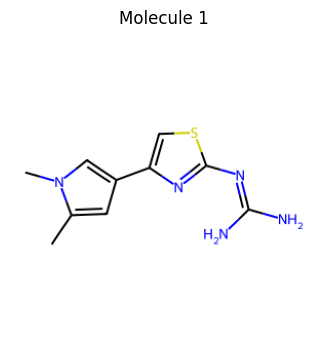


Molecule 2:
SMILES: CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)CCSC)[C@@H](C)O)C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N[C@@H](CC(N)=O)C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCN=C(N)N)C(=O)NCC(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)NCC(=O)N1CCC[C@H]1C(=O)N1CCC[C@H]1C(=O)NCC(=O)N[C@@H](CO)C(=O)N[C@@H](CCCN=C(N)N)C(N)=O
Molecular Weight: 2881.59 g/mol
LogP: 3.67
Polar Surface Area: 1271.93 Å²
Hydrogen bond donors: 40
Hydrogen bond acceptors: 40
Rotatable bonds: 95
Ring count: 3
Aromatic rings: 1
LogS: 16.66 log(mol/L)
Electrostatic potential: -14.47  # Units vary depending on calculation method
Shape index: 6820.41
Surface area: 1173.55 Å²


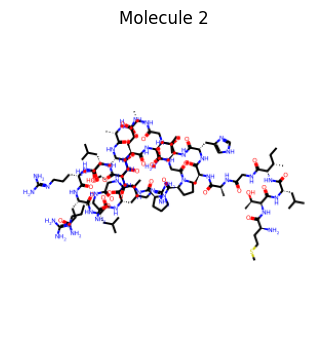


Molecule 3:
SMILES: CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](Cc2c[nH]cn2)NC(=O)[C@H](N)Cc2ccccc2)C(C)C)CCC(=O)NCCCC[C@@H](C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc2c[nH]cn2)C(=O)N[C@@H](CO)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCC)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@H](C(=O)N[C@H](C(=O)C(N)=O)[C@@H](C)CC)[C@@H](C)CC)NC(=O)[C@H](C)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](C)NC1=O
Molecular Weight: 3546.04 g/mol
LogP: 1.54
Polar Surface Area: 1502.95 Å²
Hydrogen bond donors: 48
Hydrogen bond acceptors: 46
Rotatable bonds: 111
Ring count: 4
Aromatic rings: 3
LogS: 12.20 log(mol/L)
Electrostatic potential: -17.55  # Units vary depending on calculation method
Shape index: 8894.34
Surface area: 1456.53 Å²


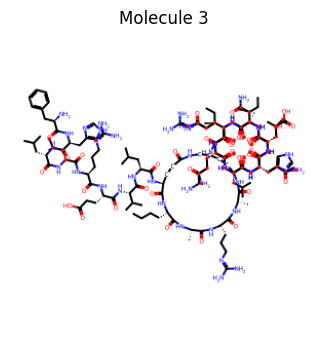

In [22]:
"""Displaying some molecules with their properties"""
print("Displaing example molecules")
n_examples = min(3, len(chembl_df))
for i in range(n_examples):
    mol = chembl_df['Mol'].iloc[i]
    print(f"\nMolecule {i+1}:")
    print(f"SMILES: {chembl_df['canonical_smiles'].iloc[i]}")
    print(f"Molecular Weight: {chembl_df['molecular_weight'].iloc[i]:.2f} g/mol") 
    print(f"LogP: {chemical_df['logP'].iloc[i]:.2f}")  # Unitless (logarithm of partition coefficient)
    print(f"Polar Surface Area: {chembl_df['polar_surface_area'].iloc[i]:.2f} Å²") 
    print(f"Hydrogen bond donors: {chembl_df['h_bond_donors'].iloc[i]}") 
    print(f"Hydrogen bond acceptors: {chembl_df['h_bond_acceptors'].iloc[i]}") 
    print(f"Rotatable bonds: {chembl_df['rotatable_bonds'].iloc[i]}") 
    print(f"Ring count: {chembl_df['ring_count'].iloc[i]}") 
    print(f"Aromatic rings: {chembl_df['aromatic_rings'].iloc[i]}") 
    print(f"LogS: {chembl_df['logS'].iloc[i]:.2f} log(mol/L)")  # Logarithm of molar solubility
    print(f"Electrostatic potential: {chembl_df['electrostatic_potential'].iloc[i]:.2f}  # Units vary depending on calculation method") 
    print(f"Shape index: {chembl_df['shape_index'].iloc[i]:.2f}")  # Unitless
    print(f"Surface area: {chembl_df['surface_area'].iloc[i]:.2f} Å²")

    #Draw the molecule
    img = Draw.MolToImage(mol)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Molecule {i+1}')
    plt.show()

In [23]:
"""Combining datasets"""
smiles_features = chemical_df.drop(columns=['pIC50'])
chembl_features = chembl_df

#concatenating datasets
combined_data = pd.concat([smiles_features, chembl_features], ignore_index=True)

In [24]:
chemical_df.isna().sum()

pIC50                      1050
num_atoms                     0
logP                          0
Mol                           0
Reverted_SMILES               0
molecular_weight              0
polar_surface_area            0
h_bond_donors                 0
h_bond_acceptors              0
rotatable_bonds               0
ring_count                    0
aromatic_rings                0
logS                          0
electrostatic_potential      13
shape_index                   0
surface_area                  0
dtype: int64

In [25]:
combined_data.isna().sum()

num_atoms                      0
logP                           0
Mol                            0
Reverted_SMILES            14999
molecular_weight               0
polar_surface_area             0
h_bond_donors                  0
h_bond_acceptors               0
rotatable_bonds                0
ring_count                     0
aromatic_rings                 0
logS                           0
electrostatic_potential       29
shape_index                    0
surface_area                   0
canonical_smiles           16087
dtype: int64

In [26]:
"""Had to SMILES data columns of both the data as for the data NaN errors between them"""
def merge_smiles_columns(chemical_df, chembl_df):
    # Make copies
    chem_df = chemical_df.copy()
    chembl_df = chembl_df.copy()
    
    # Create unified SMILES column
    chem_df['unified_smiles'] = chem_df['Reverted_SMILES']
    chembl_df['unified_smiles'] = chembl_df['canonical_smiles']
    
    # Drop original SMILES columns
    chem_df = chem_df.drop('Reverted_SMILES', axis=1)
    chembl_df = chembl_df.drop('canonical_smiles', axis=1)
    
    # Concatenate
    combined_data = pd.concat([chem_df, chembl_df], ignore_index=True)
    
    return combined_data

# Use the function
combined_data = merge_smiles_columns(smiles_features, chembl_features)
print(combined_data.isna().sum())
combined_data = combined_data.dropna()
print(combined_data.isna().sum())

num_atoms                   0
logP                        0
Mol                         0
molecular_weight            0
polar_surface_area          0
h_bond_donors               0
h_bond_acceptors            0
rotatable_bonds             0
ring_count                  0
aromatic_rings              0
logS                        0
electrostatic_potential    29
shape_index                 0
surface_area                0
unified_smiles              0
dtype: int64
num_atoms                  0
logP                       0
Mol                        0
molecular_weight           0
polar_surface_area         0
h_bond_donors              0
h_bond_acceptors           0
rotatable_bonds            0
ring_count                 0
aromatic_rings             0
logS                       0
electrostatic_potential    0
shape_index                0
surface_area               0
unified_smiles             0
dtype: int64


In [27]:
from sklearn.preprocessing import StandardScaler
#scaling the features as cluster analysis demands scaled features to ensure that all dimensions contribute equally
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_data.drop(columns=['unified_smiles', 'Mol']))
scaled_features

array([[-0.05409716,  0.60598624, -0.03322671, ...,  0.25127369,
         0.29320885, -0.05516646],
       [ 0.3839462 ,  0.42875169,  0.35454012, ..., -0.20507971,
         0.77410978,  0.31892195],
       [-0.1337414 , -0.35293751, -0.17226937, ..., -0.06566038,
        -0.1454008 , -0.15200255],
       ...,
       [ 0.18483558,  0.58873804,  0.14261993, ...,  0.24952222,
         0.4839995 ,  0.10727039],
       [ 0.26447983,  0.08643455,  0.20979477, ..., -0.30947447,
         0.14471184,  0.2456129 ],
       [ 0.06536921,  0.18655307, -0.01341984, ...,  0.079899  ,
         0.21679979,  0.02628848]], shape=(31057, 13))

In [28]:
"""Performing clustering"""
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

#Add cluster labels to the combined dataset
combined_data['Cluster'] = clusters
combined_data

,num_atoms,logP,Mol,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,unified_smiles,Cluster
0,25,4.15910,<rdkit.Chem.rdchem.Mol object at 0x7b8058b0e490>,367.044919,71.95,1,5,4,4,4,-4.15910,-0.977179,1139.934665,148.617553,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4
1,36,3.67430,<rdkit.Chem.rdchem.Mol object at 0x7b8058b30900>,506.126768,149.78,4,6,7,5,5,-3.67430,-1.777001,1619.638689,203.211921,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4
2,23,1.53610,<rdkit.Chem.rdchem.Mol object at 0x7b8058b307b0>,317.173942,101.37,3,5,5,3,2,-1.53610,-1.532649,702.416659,134.485318,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,0
3,22,0.95100,<rdkit.Chem.rdchem.Mol object at 0x7b8058b30820>,301.190260,98.96,3,5,5,3,2,-0.95100,-1.440147,672.471157,129.421661,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,0
4,21,3.21300,<rdkit.Chem.rdchem.Mol object at 0x7b8058b30890>,294.093917,49.84,2,3,2,3,3,-3.21300,-1.062501,800.893785,127.797847,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31081,24,6.66240,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5ee0>,387.981559,28.68,1,2,3,3,3,-6.66240,-0.673083,863.504238,149.565591,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,4
31082,28,5.33712,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5f50>,432.032239,62.82,1,3,5,3,3,-5.33712,-0.869420,1112.869212,162.660032,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,4
31083,31,4.11192,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5fc0>,430.116522,89.93,1,5,3,4,4,-4.11192,-0.980249,1330.250452,172.323546,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,4
31084,33,2.73794,<rdkit.Chem.rdchem.Mol object at 0x7b80499d6030>,454.210387,124.96,4,5,9,3,2,-2.73794,-1.959967,991.807248,192.513217,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,4


In [64]:
combined_data.iloc[4]

num_atoms                                                                21
logP                                                                  3.213
Mol                        <rdkit.Chem.rdchem.Mol object at 0x75e4422b8740>
molecular_weight                                                 294.093917
polar_surface_area                                                    49.84
h_bond_donors                                                             2
h_bond_acceptors                                                          3
rotatable_bonds                                                           2
ring_count                                                                3
aromatic_rings                                                            3
logS                                                                 -3.213
electrostatic_potential                                           -1.062501
shape_index                                                      800.893785
surface_area

In [73]:

# Split back into SMILES and ChEMBL datasets
chemical_df['Cluster'] = combined_data.loc[:len(chemical_df)-1, 'Cluster']
chembl_df['Cluster'] = combined_data.loc[len(chemical_df):, 'Cluster'].reset_index(drop=True)

chembl_df

/tmp/ipykernel_10062/3504323462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_df['Cluster'] = combined_data.loc[len(chemical_df):, 'Cluster'].reset_index(drop=True)


,canonical_smiles,Mol,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,logP,num_atoms,Cluster,Predicted_pIC50
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,<rdkit.Chem.rdchem.Mol object at 0x75e435670ac0>,235.089166,82.22,2,4,2,2,2,-1.36192,-1.087444,513.651823,97.437571,1.36192,16,0.0,NaN
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x75e4356705f0>,2881.593331,1271.93,40,40,95,3,1,16.66110,-14.470447,6820.412238,1173.552765,-16.66110,202,3.0,NaN
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,<rdkit.Chem.rdchem.Mol object at 0x75e44274bed0>,3546.042308,1502.95,48,46,111,4,3,12.19580,-17.545872,8894.341582,1456.529763,-12.19580,251,3.0,NaN
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,<rdkit.Chem.rdchem.Mol object at 0x75e435670580>,2596.040132,979.36,35,41,34,12,9,5.58640,-13.196273,7616.296468,1062.698993,-5.58640,185,3.0,NaN
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x75e435670c80>,428.096021,75.20,2,7,6,4,3,-3.27500,-1.464811,910.345393,165.853578,3.27500,27,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca730>,387.981559,28.68,1,2,3,3,3,-6.66240,-0.673083,863.504238,149.565591,6.66240,24,NaN,NaN
14996,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca7a0>,432.032239,62.82,1,3,5,3,3,-5.33712,-0.869420,1112.869212,162.660032,5.33712,28,NaN,NaN
14997,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca810>,430.116522,89.93,1,5,3,4,4,-4.11192,-0.980249,1330.250452,172.323546,4.11192,31,NaN,NaN
14998,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca880>,454.210387,124.96,4,5,9,3,2,-2.73794,-1.959967,991.807248,192.513217,2.73794,33,NaN,NaN


In [70]:
chemical_df

,pIC50,num_atoms,logP,Mol,Reverted_SMILES,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,Cluster
0,4.26,25,4.15910,<rdkit.Chem.rdchem.Mol object at 0x75e442216340>,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,367.044919,71.95,1,5,4,4,4,-4.15910,-0.977179,1139.934665,148.617553,4.0
1,4.34,36,3.67430,<rdkit.Chem.rdchem.Mol object at 0x75e4422b87b0>,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,506.126768,149.78,4,6,7,5,5,-3.67430,-1.777001,1619.638689,203.211921,4.0
2,4.53,23,1.53610,<rdkit.Chem.rdchem.Mol object at 0x75e4422b8660>,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,317.173942,101.37,3,5,5,3,2,-1.53610,-1.532649,702.416659,134.485318,0.0
3,4.56,22,0.95100,<rdkit.Chem.rdchem.Mol object at 0x75e4422b86d0>,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,301.190260,98.96,3,5,5,3,2,-0.95100,-1.440147,672.471157,129.421661,0.0
4,4.59,21,3.21300,<rdkit.Chem.rdchem.Mol object at 0x75e4422b8740>,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,294.093917,49.84,2,3,2,3,3,-3.21300,-1.062501,800.893785,127.797847,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16082,0.00,24,3.21560,<rdkit.Chem.rdchem.Mol object at 0x75e43eaa4040>,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,333.104816,62.20,2,4,4,3,3,-3.21560,-1.227328,778.302449,145.038735,4.0
16083,0.00,19,5.45270,<rdkit.Chem.rdchem.Mol object at 0x75e43eaa40b0>,S=C=NCCCCCCCCCCc1ccccc1,275.170771,12.36,0,2,11,1,1,-5.45270,-0.910911,354.784631,122.699869,0.0
16084,0.00,17,4.67250,<rdkit.Chem.rdchem.Mol object at 0x75e43eaa4120>,S=C=NCCCCCCCCc1ccccc1,247.139471,12.36,0,2,9,1,1,-4.67250,-0.804299,328.034873,109.969985,0.0
16085,0.00,22,3.93289,<rdkit.Chem.rdchem.Mol object at 0x75e43eaa4190>,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,306.093917,38.54,1,4,3,4,4,-3.93289,-1.023548,978.497515,132.196992,4.0


In [71]:
cluster_pIC50 = chemical_df.groupby('Cluster')['pIC50'].mean()
chembl_df['Predicted_pIC50'] = chembl_df['Cluster'].map(cluster_pIC50)

/tmp/ipykernel_10062/65765162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_df['Predicted_pIC50'] = chembl_df['Cluster'].map(cluster_pIC50)


In [72]:
chembl_df

,canonical_smiles,Mol,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,logP,num_atoms,Cluster,Predicted_pIC50
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,<rdkit.Chem.rdchem.Mol object at 0x75e435670ac0>,235.089166,82.22,2,4,2,2,2,-1.36192,-1.087444,513.651823,97.437571,1.36192,16,NaN,NaN
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x75e4356705f0>,2881.593331,1271.93,40,40,95,3,1,16.66110,-14.470447,6820.412238,1173.552765,-16.66110,202,NaN,NaN
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,<rdkit.Chem.rdchem.Mol object at 0x75e44274bed0>,3546.042308,1502.95,48,46,111,4,3,12.19580,-17.545872,8894.341582,1456.529763,-12.19580,251,NaN,NaN
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,<rdkit.Chem.rdchem.Mol object at 0x75e435670580>,2596.040132,979.36,35,41,34,12,9,5.58640,-13.196273,7616.296468,1062.698993,-5.58640,185,NaN,NaN
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x75e435670c80>,428.096021,75.20,2,7,6,4,3,-3.27500,-1.464811,910.345393,165.853578,3.27500,27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca730>,387.981559,28.68,1,2,3,3,3,-6.66240,-0.673083,863.504238,149.565591,6.66240,24,NaN,NaN
14996,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca7a0>,432.032239,62.82,1,3,5,3,3,-5.33712,-0.869420,1112.869212,162.660032,5.33712,28,NaN,NaN
14997,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca810>,430.116522,89.93,1,5,3,4,4,-4.11192,-0.980249,1330.250452,172.323546,4.11192,31,NaN,NaN
14998,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca880>,454.210387,124.96,4,5,9,3,2,-2.73794,-1.959967,991.807248,192.513217,2.73794,33,NaN,NaN


In [78]:
combined_data['Cluster'] = clusters

# Update Cluster column for each dataset
chemical_df['Cluster'] = combined_data.loc[:len(chemical_df)-1, 'Cluster'].reset_index(drop=True)
chembl_df['Cluster'] = combined_data.loc[len(chemical_df):, 'Cluster'].reset_index(drop=True)

# Group chemical_df by Cluster to calculate mean pIC50
cluster_pIC50 = chemical_df.groupby('Cluster')['pIC50'].mean()

# Map Predicted_pIC50 for chembl_df
chembl_df['Predicted_pIC50'] = chembl_df['Cluster'].map(cluster_pIC50)
chembl_df

/tmp/ipykernel_10062/826807143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_df['Cluster'] = combined_data.loc[len(chemical_df):, 'Cluster'].reset_index(drop=True)
/tmp/ipykernel_10062/826807143.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_df['Predicted_pIC50'] = chembl_df['Cluster'].map(cluster_pIC50)


,canonical_smiles,Mol,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,logP,num_atoms,Cluster,Predicted_pIC50
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,<rdkit.Chem.rdchem.Mol object at 0x75e435670ac0>,235.089166,82.22,2,4,2,2,2,-1.36192,-1.087444,513.651823,97.437571,1.36192,16,0.0,0.150461
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x75e4356705f0>,2881.593331,1271.93,40,40,95,3,1,16.66110,-14.470447,6820.412238,1173.552765,-16.66110,202,3.0,NaN
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,<rdkit.Chem.rdchem.Mol object at 0x75e44274bed0>,3546.042308,1502.95,48,46,111,4,3,12.19580,-17.545872,8894.341582,1456.529763,-12.19580,251,3.0,NaN
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,<rdkit.Chem.rdchem.Mol object at 0x75e435670580>,2596.040132,979.36,35,41,34,12,9,5.58640,-13.196273,7616.296468,1062.698993,-5.58640,185,3.0,NaN
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x75e435670c80>,428.096021,75.20,2,7,6,4,3,-3.27500,-1.464811,910.345393,165.853578,3.27500,27,4.0,3.444369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca730>,387.981559,28.68,1,2,3,3,3,-6.66240,-0.673083,863.504238,149.565591,6.66240,24,NaN,NaN
14996,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca7a0>,432.032239,62.82,1,3,5,3,3,-5.33712,-0.869420,1112.869212,162.660032,5.33712,28,NaN,NaN
14997,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca810>,430.116522,89.93,1,5,3,4,4,-4.11192,-0.980249,1330.250452,172.323546,4.11192,31,NaN,NaN
14998,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca880>,454.210387,124.96,4,5,9,3,2,-2.73794,-1.959967,991.807248,192.513217,2.73794,33,NaN,NaN


In [80]:
missing_clusters = set(chembl_df['Cluster'].dropna().unique()) - set(chemical_df['Cluster'].unique())
print(f"Clusters in chembl_df but not in chemical_df: {missing_clusters}")


Clusters in chembl_df but not in chemical_df: {np.float64(1.0), np.float64(3.0)}


In [81]:
cluster_pIC50 = chemical_df.groupby('Cluster')['pIC50'].mean()
print(cluster_pIC50)


Cluster
0.0    0.150461
2.0    0.130000
4.0    3.444369
Name: pIC50, dtype: float64


In [82]:
chembl_df['Predicted_pIC50'] = chembl_df['Cluster'].map(cluster_pIC50)
print(chembl_df[['Cluster', 'Predicted_pIC50']].head())


   Cluster  Predicted_pIC50
0      0.0         0.150461
1      3.0              NaN
2      3.0              NaN
3      3.0              NaN
4      4.0         3.444369


/tmp/ipykernel_10062/1043012512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_df['Predicted_pIC50'] = chembl_df['Cluster'].map(cluster_pIC50)


In [83]:
# Fill missing Predicted_pIC50 values with a default value (e.g., 0)
chembl_df['Predicted_pIC50'] = chembl_df['Cluster'].map(cluster_pIC50).fillna(0)
print(chembl_df[['Cluster', 'Predicted_pIC50']].tail())


       Cluster  Predicted_pIC50
14995      NaN              0.0
14996      NaN              0.0
14997      NaN              0.0
14998      NaN              0.0
14999      NaN              0.0


/tmp/ipykernel_10062/3788984722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_df['Predicted_pIC50'] = chembl_df['Cluster'].map(cluster_pIC50).fillna(0)


In [84]:
chembl_df

,canonical_smiles,Mol,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,logP,num_atoms,Cluster,Predicted_pIC50
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,<rdkit.Chem.rdchem.Mol object at 0x75e435670ac0>,235.089166,82.22,2,4,2,2,2,-1.36192,-1.087444,513.651823,97.437571,1.36192,16,0.0,0.150461
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x75e4356705f0>,2881.593331,1271.93,40,40,95,3,1,16.66110,-14.470447,6820.412238,1173.552765,-16.66110,202,3.0,0.000000
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,<rdkit.Chem.rdchem.Mol object at 0x75e44274bed0>,3546.042308,1502.95,48,46,111,4,3,12.19580,-17.545872,8894.341582,1456.529763,-12.19580,251,3.0,0.000000
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,<rdkit.Chem.rdchem.Mol object at 0x75e435670580>,2596.040132,979.36,35,41,34,12,9,5.58640,-13.196273,7616.296468,1062.698993,-5.58640,185,3.0,0.000000
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x75e435670c80>,428.096021,75.20,2,7,6,4,3,-3.27500,-1.464811,910.345393,165.853578,3.27500,27,4.0,3.444369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca730>,387.981559,28.68,1,2,3,3,3,-6.66240,-0.673083,863.504238,149.565591,6.66240,24,NaN,0.000000
14996,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca7a0>,432.032239,62.82,1,3,5,3,3,-5.33712,-0.869420,1112.869212,162.660032,5.33712,28,NaN,0.000000
14997,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca810>,430.116522,89.93,1,5,3,4,4,-4.11192,-0.980249,1330.250452,172.323546,4.11192,31,NaN,0.000000
14998,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca880>,454.210387,124.96,4,5,9,3,2,-2.73794,-1.959967,991.807248,192.513217,2.73794,33,NaN,0.000000


In [85]:
# Handle rows with NaN in the Cluster column separately
nan_cluster_mask = chembl_df['Cluster'].isna()

# Map Predicted_pIC50 for non-NaN clusters
chembl_df.loc[~nan_cluster_mask, 'Predicted_pIC50'] = chembl_df.loc[~nan_cluster_mask, 'Cluster'].map(cluster_pIC50)

# Assign a default value (e.g., 0) for rows where Cluster is NaN
chembl_df.loc[nan_cluster_mask, 'Predicted_pIC50'] = 0
chembl_df

,canonical_smiles,Mol,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,logP,num_atoms,Cluster,Predicted_pIC50
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,<rdkit.Chem.rdchem.Mol object at 0x75e435670ac0>,235.089166,82.22,2,4,2,2,2,-1.36192,-1.087444,513.651823,97.437571,1.36192,16,0.0,0.150461
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x75e4356705f0>,2881.593331,1271.93,40,40,95,3,1,16.66110,-14.470447,6820.412238,1173.552765,-16.66110,202,3.0,NaN
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,<rdkit.Chem.rdchem.Mol object at 0x75e44274bed0>,3546.042308,1502.95,48,46,111,4,3,12.19580,-17.545872,8894.341582,1456.529763,-12.19580,251,3.0,NaN
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,<rdkit.Chem.rdchem.Mol object at 0x75e435670580>,2596.040132,979.36,35,41,34,12,9,5.58640,-13.196273,7616.296468,1062.698993,-5.58640,185,3.0,NaN
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x75e435670c80>,428.096021,75.20,2,7,6,4,3,-3.27500,-1.464811,910.345393,165.853578,3.27500,27,4.0,3.444369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca730>,387.981559,28.68,1,2,3,3,3,-6.66240,-0.673083,863.504238,149.565591,6.66240,24,NaN,0.000000
14996,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca7a0>,432.032239,62.82,1,3,5,3,3,-5.33712,-0.869420,1112.869212,162.660032,5.33712,28,NaN,0.000000
14997,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca810>,430.116522,89.93,1,5,3,4,4,-4.11192,-0.980249,1330.250452,172.323546,4.11192,31,NaN,0.000000
14998,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x75e43aaca880>,454.210387,124.96,4,5,9,3,2,-2.73794,-1.959967,991.807248,192.513217,2.73794,33,NaN,0.000000


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def merge_chemical_datasets(chemical_df, chembl_df, smiles_col_chemical='Reverted_SMILES', 
                          smiles_col_chembl='canonical_smiles', exclude_cols=None):
    """
    Merge chemical and ChEMBL datasets, handling SMILES column unification and NaN values.
    
    Parameters:
    -----------
    chemical_df : pandas.DataFrame
        First chemical dataset
    chembl_df : pandas.DataFrame
        ChEMBL dataset
    smiles_col_chemical : str
        Name of SMILES column in chemical dataset
    smiles_col_chembl : str
        Name of SMILES column in ChEMBL dataset
    exclude_cols : list
        Columns to exclude from processing
    
    Returns:
    --------
    pandas.DataFrame
        Combined and cleaned dataset
    """
    if exclude_cols is None:
        exclude_cols = []
    
    # Make copies to avoid modifying original data
    chem_df = chemical_df.copy()
    chembl_df = chembl_df.copy()
    
    # Create unified SMILES column
    chem_df['unified_smiles'] = chem_df[smiles_col_chemical]
    chembl_df['unified_smiles'] = chembl_df[smiles_col_chembl]
    
    # Drop original SMILES columns
    chem_df = chem_df.drop(smiles_col_chemical, axis=1)
    chembl_df = chembl_df.drop(smiles_col_chembl, axis=1)
    
    # Combine datasets
    combined_data = pd.concat([chem_df, chembl_df], ignore_index=True)
    
    # Remove specified columns and any columns with all NaN values
    cols_to_drop = exclude_cols + combined_data.columns[combined_data.isna().all()].tolist()
    combined_data = combined_data.drop(columns=cols_to_drop, errors='ignore')
    
    # Drop rows with any remaining NaN values
    combined_data = combined_data.dropna()
    
    return combined_data

def cluster_and_predict(combined_data, n_clusters=5, exclude_from_clustering=None, random_state=42):
    """
    Perform clustering on chemical data and predict values based on cluster assignments.
    
    Parameters:
    -----------
    combined_data : pandas.DataFrame
        Combined chemical dataset
    n_clusters : int
        Number of clusters for KMeans
    exclude_from_clustering : list
        Columns to exclude from clustering
    random_state : int
        Random state for reproducibility
    
    Returns:
    --------
    tuple
        (clustered_data, cluster_means)
    """
    if exclude_from_clustering is None:
        exclude_from_clustering = ['unified_smiles', 'Mol']
    
    # Prepare features for clustering
    features = combined_data.drop(columns=exclude_from_clustering)
    
    # Scale features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(scaled_features)
    
    # Add cluster assignments to the dataset
    combined_data['Cluster'] = clusters
    
    return combined_data, kmeans

def split_and_predict_pIC50(combined_data, chemical_df_length, target_col='pIC50'):
    """
    Split clustered data back into original datasets and predict pIC50 values.
    
    Parameters:
    -----------
    combined_data : pandas.DataFrame
        Clustered combined dataset
    chemical_df_length : int
        Length of original chemical dataset
    target_col : str
        Name of the target column for predictions
    
    Returns:
    --------
    tuple
        (chemical_df with clusters, chembl_df with predictions)
    """
    # Split back into original datasets
    chemical_portion = combined_data.iloc[:chemical_df_length].copy()
    chembl_portion = combined_data.iloc[chemical_df_length:].copy()
    
    # Calculate mean pIC50 per cluster
    cluster_means = chemical_portion.groupby('Cluster')[target_col].mean()
    
    # Add predictions to ChEMBL dataset
    chembl_portion['Predicted_pIC50'] = chembl_portion['Cluster'].map(cluster_means)
    
    return chemical_portion, chembl_portion


Chemical Dataset Info:
Shape: (16087, 16)

Columns:
- pIC50: float64
- num_atoms: int64
- logP: float64
- Mol: object
- Reverted_SMILES: object
- molecular_weight: float64
- polar_surface_area: float64
- h_bond_donors: int64
- h_bond_acceptors: int64
- rotatable_bonds: int64
- ring_count: int64
- aromatic_rings: int64
- logS: float64
- electrostatic_potential: float64
- shape_index: float64
- surface_area: float64

Missing values:
pIC50                      1050
num_atoms                     0
logP                          0
Mol                           0
Reverted_SMILES               0
molecular_weight              0
polar_surface_area            0
h_bond_donors                 0
h_bond_acceptors              0
rotatable_bonds               0
ring_count                    0
aromatic_rings                0
logS                          0
electrostatic_potential      13
shape_index                   0
surface_area                  0
dtype: int64

ChEMBL Dataset Info:
Shape: (14999, 15

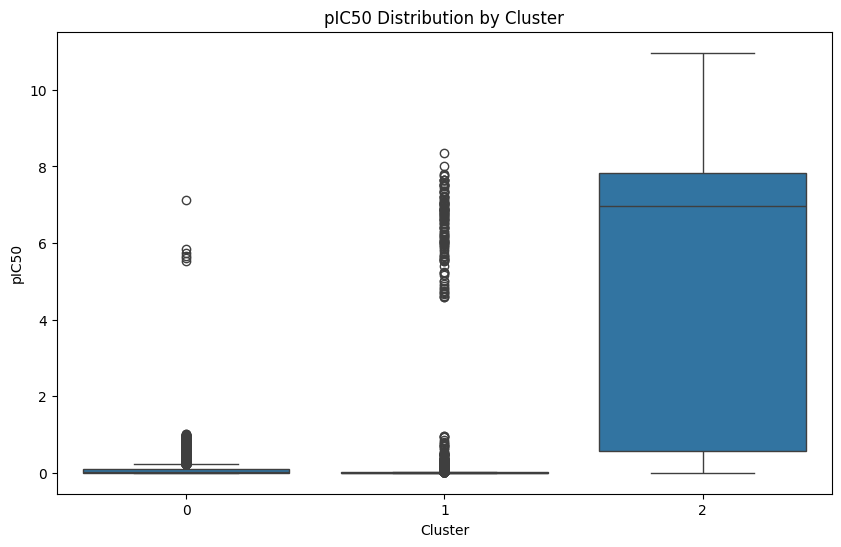

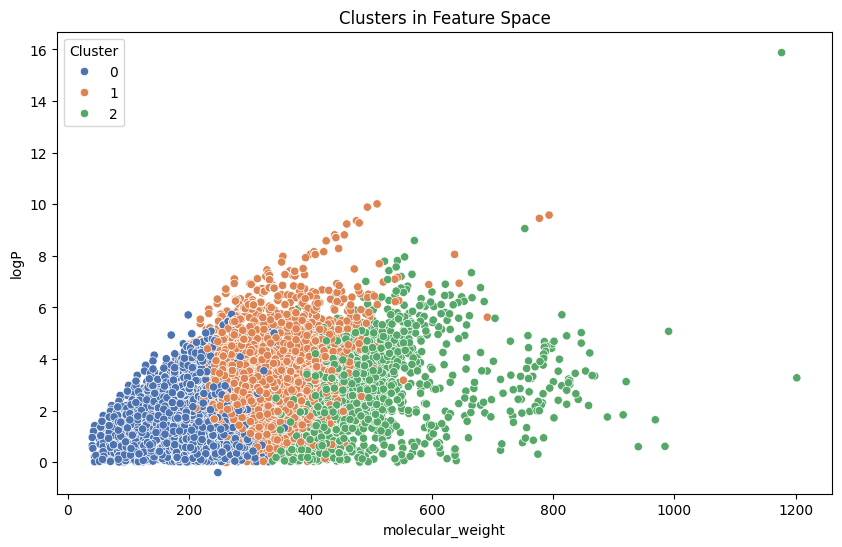

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score

# Assuming you have your initial dataframes: chemical_df and chembl_df

# 1. First, let's validate our input data
def print_dataset_info(df, name):
    print(f"\n{name} Dataset Info:")
    print(f"Shape: {df.shape}")
    print("\nColumns:")
    for col in df.columns:
        print(f"- {col}: {df[col].dtype}")
    print("\nMissing values:")
    print(df.isna().sum())

print_dataset_info(chemical_df, "Chemical")
print_dataset_info(chembl_df, "ChEMBL")

# 2. Merge the datasets
combined_data = merge_chemical_datasets(
    chemical_df=chemical_df,
    chembl_df=chembl_df,
    smiles_col_chemical='Reverted_SMILES',
    smiles_col_chembl='canonical_smiles',
    exclude_cols=['Predicted_pIC50']  # exclude any columns you don't want in the merged dataset
)

# Verify the merge
print("\nCombined Dataset Info:")
print(f"Shape: {combined_data.shape}")
print("\nColumns in combined dataset:")
print(combined_data.columns.tolist())

# 3. Perform clustering
# You can try different numbers of clusters to find the optimal number
n_clusters_range = range(3, 8)
silhouette_scores = []

for n in n_clusters_range:
    clustered_data, kmeans = cluster_and_predict(
        combined_data=combined_data,
        n_clusters=n,
        exclude_from_clustering=['unified_smiles', 'Mol'],
        random_state=42
    )
    
    # Calculate silhouette score for this number of clusters
    features = combined_data.drop(columns=['unified_smiles', 'Mol'])
    score = silhouette_score(features, clustered_data['Cluster'])
    silhouette_scores.append(score)
    print(f"Number of clusters: {n}, Silhouette score: {score:.3f}")

# Use the optimal number of clusters
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_n_clusters}")

# Perform final clustering with optimal number of clusters
clustered_data, final_kmeans = cluster_and_predict(
    combined_data=combined_data,
    n_clusters=optimal_n_clusters,
    exclude_from_clustering=['unified_smiles', 'Mol'],
    random_state=42
)

# 4. Split data and make predictions
chemical_df_final, chembl_df_predicted = split_and_predict_pIC50(
    combined_data=clustered_data,
    chemical_df_length=len(chemical_df),
    target_col='pIC50'
)

# 5. Analyze results
print("\nCluster Analysis:")
cluster_stats = chemical_df_final.groupby('Cluster').agg({
    'pIC50': ['count', 'mean', 'std']
}).round(3)
print(cluster_stats)

print("\nPredictions Summary:")
print(chembl_df_predicted['Predicted_pIC50'].describe().round(3))

# 6. Save results if needed
chemical_df_final.to_csv('clustered_chemical_data.csv', index=False)
chembl_df_predicted.to_csv('chembl_predictions.csv', index=False)

# 7. Visualize cluster distributions (optional)
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=chemical_df_final, x='Cluster', y='pIC50')
    plt.title('pIC50 Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('pIC50')
    plt.show()
    
    # Scatter plot of two important features colored by cluster
    features = ['molecular_weight', 'logP']  # adjust these features as needed
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=clustered_data,
        x=features[0],
        y=features[1],
        hue='Cluster',
        palette='deep'
    )
    plt.title('Clusters in Feature Space')
    plt.show()
except ImportError:
    print("Matplotlib and/or seaborn not available for visualization")

In [35]:
chembl_df

,canonical_smiles,Mol,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,logP,num_atoms
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f44a0>,235.089166,82.22,2,4,2,2,2,-1.36192,-1.087444,513.651823,97.437571,1.36192,16
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f5150>,2881.593331,1271.93,40,40,95,3,1,16.66110,-14.470447,6820.412238,1173.552765,-16.66110,202
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4e40>,3546.042308,1502.95,48,46,111,4,3,12.19580,-17.545872,8894.341582,1456.529763,-12.19580,251
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4f20>,2596.040132,979.36,35,41,34,12,9,5.58640,-13.196273,7616.296468,1062.698993,-5.58640,185
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4350>,428.096021,75.20,2,7,6,4,3,-3.27500,-1.464811,910.345393,165.853578,3.27500,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5ee0>,387.981559,28.68,1,2,3,3,3,-6.66240,-0.673083,863.504238,149.565591,6.66240,24
14996,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5f50>,432.032239,62.82,1,3,5,3,3,-5.33712,-0.869420,1112.869212,162.660032,5.33712,28
14997,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5fc0>,430.116522,89.93,1,5,3,4,4,-4.11192,-0.980249,1330.250452,172.323546,4.11192,31
14998,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d6030>,454.210387,124.96,4,5,9,3,2,-2.73794,-1.959967,991.807248,192.513217,2.73794,33


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

def prepare_molecular_data(chemical_df, chembl_df):
    """
    Prepare molecular data for clustering by selecting common features and handling missing values.
    """
    # Common features between both datasets (excluding SMILES, Mol, and target)
    common_features = [
        'molecular_weight', 'polar_surface_area', 'h_bond_donors',
        'h_bond_acceptors', 'rotatable_bonds', 'ring_count',
        'aromatic_rings', 'logS', 'electrostatic_potential',
        'shape_index', 'surface_area', 'logP', 'num_atoms'
    ]
    
    # Filter features that exist in both dataframes
    existing_features = [f for f in common_features 
                        if f in chemical_df.columns and f in chembl_df.columns]
    
    print("Features being used:", existing_features)
    
    # Select features from both datasets
    chemical_features = chemical_df[existing_features].copy()
    chembl_features = chembl_df[existing_features].copy()
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    
    # Fit imputer on combined data to get consistent imputation
    combined_features = pd.concat([chemical_features, chembl_features], ignore_index=True)
    imputed_features = imputer.fit_transform(combined_features)
    
    # Split back into separate datasets
    chemical_features_clean = pd.DataFrame(
        imputed_features[:len(chemical_features)],
        columns=existing_features
    )
    chembl_features_clean = pd.DataFrame(
        imputed_features[len(chemical_features):],
        columns=existing_features
    )
    
    return chemical_features_clean, chembl_features_clean

def cluster_and_predict_pIC50(chemical_features, chembl_features, chemical_pIC50, n_clusters=5):
    """
    Cluster molecules and predict pIC50 values for chembl molecules.
    """
    # Combine features for scaling
    combined_features = pd.concat([chemical_features, chembl_features], ignore_index=True)
    
    # Scale features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(combined_features)
    
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    
    # Split clusters back into chemical and chembl portions
    chemical_clusters = clusters[:len(chemical_features)]
    chembl_clusters = clusters[len(chemical_features):]
    
    # Calculate mean pIC50 for each cluster from chemical data
    cluster_data = pd.DataFrame({
        'Cluster': chemical_clusters,
        'pIC50': chemical_pIC50
    })
    
    # Calculate cluster means and handle empty clusters
    cluster_pIC50_means = {}
    global_mean_pIC50 = chemical_pIC50.mean()
    
    # Get unique clusters from both datasets
    all_clusters = np.unique(np.concatenate([chemical_clusters, chembl_clusters]))
    
    # Calculate means for each cluster, use global mean for empty clusters
    for cluster in all_clusters:
        cluster_values = cluster_data[cluster_data['Cluster'] == cluster]['pIC50']
        if len(cluster_values) > 0:
            cluster_pIC50_means[cluster] = cluster_values.mean()
        else:
            print(f"Warning: Cluster {cluster} has no reference molecules. Using global mean.")
            cluster_pIC50_means[cluster] = global_mean_pIC50
    
    # Assign predicted pIC50 values to chembl molecules
    predicted_pIC50 = [cluster_pIC50_means[cluster] for cluster in chembl_clusters]
    
    return chemical_clusters, chembl_clusters, predicted_pIC50

def analyze_clusters(chemical_clusters, chemical_pIC50):
    """
    Analyze cluster distributions and sizes.
    """
    cluster_data = pd.DataFrame({
        'Cluster': chemical_clusters,
        'pIC50': chemical_pIC50
    })
    
    print("\nCluster Sizes:")
    print(cluster_data['Cluster'].value_counts().sort_index())
    
    print("\nCluster pIC50 Statistics:")
    print(cluster_data.groupby('Cluster')['pIC50'].agg(['count', 'mean', 'std']).round(3))

def main():
    # Print initial data info
    print("\nInitial data shape:")
    print(f"Chemical dataset: {chemical_df.shape}")
    print(f"ChEMBL dataset: {chembl_df.shape}")
    
    # 1. Prepare features
    chemical_features, chembl_features = prepare_molecular_data(chemical_df, chembl_df)
    
    print("\nData shape after cleaning:")
    print(f"Chemical features: {chemical_features.shape}")
    print(f"ChEMBL features: {chembl_features.shape}")
    
    # 2. Get pIC50 values from chemical dataset
    chemical_pIC50 = chemical_df['pIC50'].values
    
    # 3. Perform clustering and prediction
    chemical_clusters, chembl_clusters, predicted_pIC50 = cluster_and_predict_pIC50(
        chemical_features, 
        chembl_features, 
        chemical_pIC50,
        n_clusters=5
    )
    
    # Analyze clusters
    analyze_clusters(chemical_clusters, chemical_pIC50)
    
    # 4. Add results to original dataframes
    chemical_df_with_clusters = chemical_df.copy()
    chemical_df_with_clusters['Cluster'] = chemical_clusters
    
    chembl_df_with_predictions = chembl_df.copy()
    chembl_df_with_predictions['Cluster'] = chembl_clusters
    chembl_df_with_predictions['Predicted_pIC50'] = predicted_pIC50
    
    return chemical_df_with_clusters, chembl_df_with_predictions

# Run the analysis
chemical_results, chembl_predictions = main()

# Print detailed prediction results
print("\nPrediction Results Sample:")
print(chembl_predictions[['canonical_smiles', 'Cluster', 'Predicted_pIC50']].head())

print("\nPredicted pIC50 Statistics:")
print(chembl_predictions['Predicted_pIC50'].describe().round(3))

# Optional: Save results
chemical_results.to_csv('chemical_results.csv', index=False)
chembl_predictions.to_csv('chembl_predictions.csv', index=False)


Initial data shape:
Chemical dataset: (16087, 16)
ChEMBL dataset: (14999, 15)
Features being used: ['molecular_weight', 'polar_surface_area', 'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds', 'ring_count', 'aromatic_rings', 'logS', 'electrostatic_potential', 'shape_index', 'surface_area', 'logP', 'num_atoms']

Data shape after cleaning:
Chemical features: (16087, 13)
ChEMBL features: (14999, 13)

Cluster Sizes:
Cluster
0    9690
2    5280
4    1117
Name: count, dtype: int64

Cluster pIC50 Statistics:
         count   mean    std
Cluster                     
0         8660  0.116  0.380
2         5265  1.476  2.984
4         1112  5.614  3.381

Prediction Results Sample:
                                    canonical_smiles  Cluster  Predicted_pIC50
0                       Cc1cc(-c2csc(N=C(N)N)n2)cn1C        0         0.116029
1  CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...        1              NaN
2  CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...        1              Na

In [40]:
data = pd.read_csv('chembl_predictions.csv')
data = data.dropna()
data

,canonical_smiles,Mol,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,logP,num_atoms,Cluster,Predicted_pIC50
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f44a0>,235.089166,82.22,2,4,2,2,2,-1.36192,-1.087444,513.651823,97.437571,1.36192,16,0,0.116029
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4350>,428.096021,75.20,2,7,6,4,3,-3.27500,-1.464811,910.345393,165.853578,3.27500,27,2,1.475934
5,COc1c(O)cc(O)c(C(=N)Cc2ccc(O)cc2)c1O,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4f90>,289.095023,114.00,5,6,4,2,2,-2.12817,-1.965289,679.453599,120.559155,2.12817,21,2,1.475934
6,CCOC(=O)c1cc2cc(C(=O)O)ccc2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f5230>,233.068808,79.39,2,3,3,2,2,-2.04280,-0.940858,585.203196,97.012820,2.04280,17,0,0.116029
7,CC(=O)O[C@@H]1[C@@H](OC(C)=O)/C(C)=C\[C@@H]2OC...,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f40b0>,580.215591,184.49,2,13,4,4,0,-0.43040,-1.846871,1235.210682,236.267507,0.43040,41,2,1.475934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,FC(F)(F)Sc1nc(-c2ccc(Cl)c(Cl)c2)c(-c2ccccc2)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5ee0>,387.981559,28.68,1,2,3,3,3,-6.66240,-0.673083,863.504238,149.565591,6.66240,24,2,1.475934
14995,Cc1ccc(-c2[nH]c(S(=O)(=O)C(F)(F)C(F)F)nc2-c2cc...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5f50>,432.032239,62.82,1,3,5,3,3,-5.33712,-0.869420,1112.869212,162.660032,5.33712,28,2,1.475934
14996,Cc1cc(F)ccc1-c1nc(N(C(N)=O)c2c(F)cc(F)cc2F)c2n...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d5fc0>,430.116522,89.93,1,5,3,4,4,-4.11192,-0.980249,1330.250452,172.323546,4.11192,31,4,5.613705
14997,Cc1cc(C)cc(NC(=O)Cc2ccc(OC3(C(=O)N[C@H](CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x7b80499d6030>,454.210387,124.96,4,5,9,3,2,-2.73794,-1.959967,991.807248,192.513217,2.73794,33,2,1.475934


In [7]:
data2 = pd.read_csv('chemical_results.csv')
data2

NameError: name 'pd' is not defined

In [44]:
data = data.rename(columns={'canonical_smiles': 'SMILES'})
data.columns

Index(['SMILES', 'Mol', 'molecular_weight', 'polar_surface_area',
       'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds', 'ring_count',
       'aromatic_rings', 'logS', 'electrostatic_potential', 'shape_index',
       'surface_area', 'logP', 'num_atoms', 'Cluster', 'Predicted_pIC50'],
      dtype='object')

In [6]:
data2 = data2.rename(columns={'Reverted_SMILES': 'SMILES'})
data2.columns

Index(['pIC50', 'num_atoms', 'logP', 'Mol', 'SMILES', 'molecular_weight',
       'polar_surface_area', 'h_bond_donors', 'h_bond_acceptors',
       'rotatable_bonds', 'ring_count', 'aromatic_rings', 'logS',
       'electrostatic_potential', 'shape_index', 'surface_area', 'Cluster'],
      dtype='object')

In [19]:
data2[['SMILES', 'pIC50', 'num_atoms', 'logP']].to_csv('Final_data2.csv')

In [17]:
data2.to_csv('Final_data2.csv')

In [51]:
data.columns

Index(['SMILES', 'Mol', 'molecular_weight', 'polar_surface_area',
       'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds', 'ring_count',
       'aromatic_rings', 'logS', 'electrostatic_potential', 'shape_index',
       'surface_area', 'logP', 'num_atoms', 'Cluster', 'pIC50'],
      dtype='object')

In [55]:
import pandas as pd

def merge_chemical_datasets(df1, df2):
    """
    Merge two chemical datasets with same columns in different orders.
    
    Parameters:
    df1, df2 : pandas DataFrames with matching columns
    
    Returns:
    pandas DataFrame : Combined dataset with aligned columns
    """
    # Get the common columns in a consistent order
    common_columns = sorted(list(set(df1.columns) & set(df2.columns)))
    
    # Ensure both dataframes have columns in the same order
    df1_aligned = df1[common_columns].copy()
    df2_aligned = df2[common_columns].copy()
    
    # Concatenate the dataframes
    merged_df = pd.concat([df1_aligned, df2_aligned], axis=0, ignore_index=True)
    
    return merged_df

# Example usage:
merged_data = merge_chemical_datasets(data, data2)
merged_data.to_csv('smiles_chembl_merged_data.csv')

In [3]:
chembl_df.iloc[0]['canonical_smiles']

'Cc1cc(-c2csc(N=C(N)N)n2)cn1C'

In [6]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole

molecule = 'Cc1cc(-c2csc(N=C(N)N)n2)cn1C'
mol = Chem.MolFromSmiles(molecule)

mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, randomSeed=42)  # note: randomSeed, not random_seed
AllChem.MMFFOptimizeMolecule(mol)          # fixed spelling here

# Save as PDB file for 3D visualization
Chem.MolToPDBFile(mol, "molecule3D.pdb")



In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

def generate_3d_structure(smiles: str):
    # Convert SMILES to RDKit molecule
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)  # Add hydrogens
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())  # Generate 3D coordinates
    return mol

def visualize_3d_structure(smiles: str):
    # Generate the 3D structure from SMILES
    mol = generate_3d_structure(smiles)
    # Convert the molecule to MolBlock format
    mol_block = Chem.MolToMolBlock(mol)
    # Visualize using py3Dmol
    viewer = py3Dmol.view(width=500, height=500)
    viewer.addModel(mol_block, "mol")  # Add the molecule to the viewer
    viewer.setStyle({"stick": {}})  # Set stick style for visualization
    viewer.setBackgroundColor("black")
    viewer.zoomTo()  # Adjust the zoom
    return viewer

# Test the visualization
viewer = visualize_3d_structure('N=[N+]=NC=Cc1ccc([N+](=O)[O-])o1')
viewer.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [14]:
chembl_df.iloc[199]['canonical_smiles']

'CC[C@@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(=O)O)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CN(C)CC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@@H]1CCCN1C(=O)[C@H](N)Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCC(N)=O)C(=O)O'

In [6]:
import pandas as pd
d = pd.read_csv('smiles_chembl_merged_data.csv')
d = d[['SMILES', 'pIC50', 'num_atoms', 'logP']]
d.to_csv('Final_data.csv')

In [9]:
x = pd.read_csv('Final_data.csv')
x.dtypes

Unnamed: 0      int64
SMILES         object
pIC50         float64
num_atoms       int64
logP          float64
dtype: object

# Experimenting with XGBoost on the chemical_df

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd



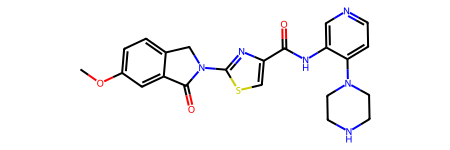

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

m = Chem.MolFromSmiles('COc1ccc2c(c1)C(=O)N(c1nc(C(=O)Nc3cnccc3N3CCNCC3)cs1)C2')
m

In [75]:
bit={}
morganfp = AllChem.GetMorganFingerprintAsBitVect(m, useChirality=True,
                                                 radius=5, nBits=1024, bitInfo=bit)


[14:57:28] DEPRECATION WARNING: please use MorganGenerator


In [76]:
morganfp

In [77]:
mfpvector = np.array(morganfp)
print(np.nonzero(mfpvector))

(array([  19,   20,   22,   33,   42,   46,   51,   56,   63,   66,   74,
         89,   90,  122,  127,  128,  147,  154,  155,  161,  181,  182,
        184,  200,  212,  231,  244,  248,  256,  257,  258,  267,  271,
        272,  281,  284,  305,  308,  314,  322,  323,  326,  329,  344,
        347,  352,  353,  356,  378,  386,  407,  431,  432,  433,  456,
        465,  476,  486,  492,  500,  511,  512,  515,  543,  552,  556,
        562,  566,  576,  577,  579,  610,  618,  631,  632,  650,  659,
        665,  667,  670,  675,  678,  695,  718,  726,  754,  781,  790,
        792,  801,  804,  807,  810,  811,  821,  831,  841,  842,  849,
        855,  875,  879,  890,  893,  916,  922,  926,  935,  938,  947,
        948,  953,  956,  970,  976,  996,  997,  999, 1003, 1020]),)


In [2]:
d = pd.read_csv('smiles_chembl_merged_data.csv')
d

,Unnamed: 0,Cluster,Mol,SMILES,aromatic_rings,electrostatic_potential,h_bond_acceptors,h_bond_donors,logP,logS,molecular_weight,num_atoms,pIC50,polar_surface_area,ring_count,rotatable_bonds,shape_index,surface_area
0,0,0,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f44a0>,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,2,-1.087444,4,2,1.36192,-1.36192,235.089166,16,0.116029,82.22,2,2,513.651823,97.437571
1,1,2,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4350>,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,3,-1.464811,7,2,3.27500,-3.27500,428.096021,27,1.475934,75.20,4,6,910.345393,165.853578
2,2,2,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f4f90>,COc1c(O)cc(O)c(C(=N)Cc2ccc(O)cc2)c1O,2,-1.965289,6,5,2.12817,-2.12817,289.095023,21,1.475934,114.00,2,4,679.453599,120.559155
3,3,0,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f5230>,CCOC(=O)c1cc2cc(C(=O)O)ccc2[nH]1,2,-0.940858,3,2,2.04280,-2.04280,233.068808,17,0.116029,79.39,2,3,585.203196,97.012820
4,4,2,<rdkit.Chem.rdchem.Mol object at 0x7b7fff4f40b0>,CC(=O)O[C@@H]1[C@@H](OC(C)=O)/C(C)=C\[C@@H]2OC...,0,-1.846871,13,2,0.43040,-0.43040,580.215591,41,1.475934,184.49,4,4,1235.210682,236.267507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30234,30234,2,<rdkit.Chem.rdchem.Mol object at 0x7b8054e80190>,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,3,-1.227328,4,2,3.21560,-3.21560,333.104816,24,0.000000,62.20,3,4,778.302449,145.038735
30235,30235,2,<rdkit.Chem.rdchem.Mol object at 0x7b8054e80200>,S=C=NCCCCCCCCCCc1ccccc1,1,-0.910911,2,0,5.45270,-5.45270,275.170771,19,0.000000,12.36,1,11,354.784631,122.699869
30236,30236,2,<rdkit.Chem.rdchem.Mol object at 0x7b8054e80270>,S=C=NCCCCCCCCc1ccccc1,1,-0.804299,2,0,4.67250,-4.67250,247.139471,17,0.000000,12.36,1,9,328.034873,109.969985
30237,30237,2,<rdkit.Chem.rdchem.Mol object at 0x7b8054e802e0>,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,4,-1.023548,4,1,3.93289,-3.93289,306.093917,22,0.000000,38.54,4,3,978.497515,132.196992


In [10]:

# Function to compute Morgan fingerprints
def compute_morgan_fingerprint(mol, radius=2, n_bits=2048):
    return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))
d['Morgan_Fingerprint'] = d['Mol'].apply(compute_morgan_fingerprint)
d

ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(str, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, unsigned int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)

In [7]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Function to create RDKit molecule from SMILES
def smiles_to_mol(smiles):
    try:
        return Chem.MolFromSmiles(smiles)
    except:
        return None

# Function to compute Morgan fingerprints
def compute_morgan_fingerprint(mol, radius=2, n_bits=2048):
    if mol is None:
        return None
    try:
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))
    except:
        return None

# Convert SMILES to RDKit molecules
data2['Mol'] = data2['SMILES'].apply(smiles_to_mol)

# Compute Morgan fingerprints
data2['Morgan_Fingerprint'] = data2['Mol'].apply(compute_morgan_fingerprint)

# Check for any failed conversions
failed_conversions = data2[data2['Morgan_Fingerprint'].isna()]
if len(failed_conversions) > 0:
    print(f"Warning: {len(failed_conversions)} molecules failed fingerprint generation")

[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerator
[11:28:08] DEPRECATION WARNING: please use MorganGenerat

In [8]:
data2

,pIC50,num_atoms,logP,Mol,SMILES,molecular_weight,polar_surface_area,h_bond_donors,h_bond_acceptors,rotatable_bonds,ring_count,aromatic_rings,logS,electrostatic_potential,shape_index,surface_area,Cluster,Morgan_Fingerprint
0,4.26,25,4.15910,<rdkit.Chem.rdchem.Mol object at 0x794c73524190>,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,367.044919,71.95,1,5,4,4,4,-4.15910,-0.977179,1139.934665,148.617553,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,4.34,36,3.67430,<rdkit.Chem.rdchem.Mol object at 0x794c735240b0>,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,506.126768,149.78,4,6,7,5,5,-3.67430,-1.777001,1619.638689,203.211921,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,4.53,23,1.53610,<rdkit.Chem.rdchem.Mol object at 0x794c73524350>,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,317.173942,101.37,3,5,5,3,2,-1.53610,-1.532649,702.416659,134.485318,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4.56,22,0.95100,<rdkit.Chem.rdchem.Mol object at 0x794c735243c0>,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,301.190260,98.96,3,5,5,3,2,-0.95100,-1.440147,672.471157,129.421661,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4.59,21,3.21300,<rdkit.Chem.rdchem.Mol object at 0x794c73524430>,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,294.093917,49.84,2,3,2,3,3,-3.21300,-1.062501,800.893785,127.797847,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16082,0.00,24,3.21560,<rdkit.Chem.rdchem.Mol object at 0x794c72ff3920>,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,333.104816,62.20,2,4,4,3,3,-3.21560,-1.227328,778.302449,145.038735,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16083,0.00,19,5.45270,<rdkit.Chem.rdchem.Mol object at 0x794c72ff3990>,S=C=NCCCCCCCCCCc1ccccc1,275.170771,12.36,0,2,11,1,1,-5.45270,-0.910911,354.784631,122.699869,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16084,0.00,17,4.67250,<rdkit.Chem.rdchem.Mol object at 0x794c72ff3a00>,S=C=NCCCCCCCCc1ccccc1,247.139471,12.36,0,2,9,1,1,-4.67250,-0.804299,328.034873,109.969985,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16085,0.00,22,3.93289,<rdkit.Chem.rdchem.Mol object at 0x794c72ff3a70>,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,306.093917,38.54,1,4,3,4,4,-3.93289,-1.023548,978.497515,132.196992,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from scipy.stats import randint, uniform
# Stack fingerprints into a matrix and combine with other features
fingerprint_matrix = np.vstack(data2['Morgan_Fingerprint'])
other_features = data2[['num_atoms', 'logP', 'molecular_weight', 
                               'polar_surface_area', 'h_bond_donors', 
                               'h_bond_acceptors', 'rotatable_bonds', 
                               'ring_count', 'aromatic_rings', 'logS', 
                               'electrostatic_potential', 'shape_index', 
                               'surface_area']].values

# Final feature matrix
X = np.hstack((fingerprint_matrix, other_features))
y = data2['pIC50'].values  # Target variable
mask = ~(np.isnan(X).any(axis=1) | np.isinf(X).any(axis=1) | np.isnan(y) | np.isinf(y))
X_clean = X[mask]
y_clean = y[mask]

print("\nCleaned data shape:", X_clean.shape)
print("Rows removed:", X.shape[0] - X_clean.shape[0])

# Train-test split with cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=320,
    learning_rate=0.1,
    max_depth=7,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")




NameError: name 'data2' is not defined

In [82]:
# Stack fingerprints into a matrix and combine with other features
fingerprint_matrix = np.vstack(chemical_df['Morgan_Fingerprint'])
other_features = chemical_df[['num_atoms', 'logP', 'molecular_weight', 
                               'polar_surface_area', 'h_bond_donors', 
                               'h_bond_acceptors', 'rotatable_bonds', 
                               'ring_count', 'aromatic_rings', 'logS', 
                               'electrostatic_potential', 'shape_index', 
                               'surface_area']].values

# Final feature matrix
X = np.hstack((fingerprint_matrix, other_features))
y = chemical_df['pIC50'].values  # Target variable
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=320,
    learning_rate=0.1,
    max_depth=8,
    random_state=42,
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")




NameError: name 'chemical_df' is not defined

In [4]:
import pickle

# Save the model to a file
with open("xgb_pIC50_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)


NameError: name 'xgb_model' is not defined

In [5]:
import pickle
# Load the model from a file
with open("xgb_pIC50_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


EOFError: Ran out of input

In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.rdMolDescriptors import CalcLabuteASA
from rdkit.Chem.GraphDescriptors import BertzCT
from rdkit.Chem import AllChem
import numpy as np

def compute_features(smiles: str):
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        raise ValueError("Invalid SMILES string")
    
    # Morgan fingerprint
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    fingerprint_array = np.array(fingerprint, dtype=int)
    
    # Molecular properties
    features = {
        "num_atoms": mol.GetNumAtoms(),
        "logP": Descriptors.MolLogP(mol),
        "molecular_weight": Descriptors.ExactMolWt(mol),
        "polar_surface_area": Descriptors.TPSA(mol),
        "h_bond_donors": Descriptors.NumHDonors(mol),
        "h_bond_acceptors": Descriptors.NumHAcceptors(mol),
        "rotatable_bonds": Descriptors.NumRotatableBonds(mol),
        "ring_count": Descriptors.RingCount(mol),
        "aromatic_rings": sum(
            1 for ring in Chem.GetSymmSSSR(mol) 
            if all(mol.GetAtomWithIdx(idx).GetIsAromatic() for idx in ring)
        ),
        "logS": -Descriptors.MolLogP(mol),
        "electrostatic_potential": sum(
            a.GetDoubleProp("_GasteigerCharge")
            for a in AllChem.ComputeGasteigerCharges(mol) or mol.GetAtoms()
        ),
        "shape_index": BertzCT(mol),
        "surface_area": CalcLabuteASA(mol),
    }
    
    return np.hstack((fingerprint_array, list(features.values())))
def predict_pIC50(smiles: str):
    try:
        # Compute features
        features = compute_features(smiles)
        # Reshape for prediction (single sample)
        features = features.reshape(1, -1)
        # Predict using the loaded model
        predicted_pIC50 = loaded_model.predict(features)
        return predicted_pIC50[0]
    except ValueError as e:
        return str(e)



In [6]:
predict_pIC50('CC(C)c1c(C(=O)O)cc(cc1C)c2nc(C)c(cc2C(=O)O)C(C)(C)O')

[16:06:00] DEPRECATION WARNING: please use MorganGenerator


1.9617028

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

def generate_3d_structure(smiles: str):
    """Generate a 3D structure for a given SMILES string."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            raise ValueError("Invalid SMILES string")
        mol = Chem.AddHs(mol)  # Add hydrogens
        AllChem.EmbedMolecule(mol, AllChem.ETKDG())  # Generate 3D coordinates
        return mol
    except Exception as e:
        raise ValueError(f"Error generating 3D structure: {e}")

def visualize_3d_structure(smiles: str):
    """Visualize a 3D structure for a given SMILES string."""
    try:
        mol = generate_3d_structure(smiles)
        mol_block = Chem.MolToMolBlock(mol)  # Convert to MolBlock format
        viewer = py3Dmol.view(width=500, height=500)
        viewer.addModel(mol_block, "mol")  # Add the molecule to the viewer
        viewer.setStyle({"stick": {}})  # Set stick style for visualization
        viewer.setBackgroundColor("black")  # Set background color
        viewer.zoomTo()  # Adjust the zoom
        return viewer
    except Exception as e:
        return str(e)


In [3]:
smiles_input = input("Enter a SMILES string")


try:
# Show prediction
    result = predict_pIC50(smiles_input)
    if result > 6:
        print("This molecule has high affinity, ideal for binding")
    elif 4 <= result <= 6:
        print("This molecule has moderate affinity, acceptable for binding but not ideal!")
    else:
        print("This molecule has low affinity")
    print(f"Predicted pIC50: {result}")

            # Visualize the molecule
    print("Rendering 3D structure...")
    viewer = visualize_3d_structure(smiles_input)
    viewer.show()  # Display in a web browser
except Exception as e:
    print(f"Error: {e}")

Error: name 'loaded_model' is not defined


[12:43:21] DEPRECATION WARNING: please use MorganGenerator


In [ ]:
import google.generativeai as genai
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from rdkit.Chem.rdMolDescriptors import CalcLabuteASA
from rdkit.Chem.GraphDescriptors import BertzCT
import numpy as np
import joblib


# Function to compute features from SMILES string
def compute_features(smiles: str):
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        raise ValueError("Invalid SMILES string")
    
    # Morgan fingerprint
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    fingerprint_array = np.array(fingerprint, dtype=int)
    
    # Molecular properties
    features = {
        "num_atoms": mol.GetNumAtoms(),
        "logP": Descriptors.MolLogP(mol),
        "molecular_weight": Descriptors.ExactMolWt(mol),
        "polar_surface_area": Descriptors.TPSA(mol),
        "h_bond_donors": Descriptors.NumHDonors(mol),
        "h_bond_acceptors": Descriptors.NumHAcceptors(mol),
        "rotatable_bonds": Descriptors.NumRotatableBonds(mol),
        "ring_count": Descriptors.RingCount(mol),
        "aromatic_rings": sum(
            1 for ring in Chem.GetSymmSSSR(mol) 
            if all(mol.GetAtomWithIdx(idx).GetIsAromatic() for idx in ring)
        ),
        "logS": -Descriptors.MolLogP(mol),
        "electrostatic_potential": sum(
            a.GetDoubleProp("_GasteigerCharge")
            for a in AllChem.ComputeGasteigerCharges(mol) or mol.GetAtoms()
        ),
        "shape_index": BertzCT(mol),
        "surface_area": CalcLabuteASA(mol),
    }
    
    return np.hstack((fingerprint_array, list(features.values())))

# Function to predict pIC50 using the loaded model
def predict_pIC50(smiles: str):
    try:
        # Compute features
        features = compute_features(smiles)
        # Reshape for prediction (single sample)
        features = features.reshape(1, -1)
        # Predict using the loaded model
        predicted_pIC50 = loaded_model.predict(features)
        return predicted_pIC50[0]
    except ValueError as e:
        return str(e)

# Function to convert a molecule to SMILES using Gemini API
def convert_to_smiles(molecule: str):
    try:
        # Call the Gemini API to convert the molecule to SMILES
        model = genai.GenerativeModel("gemini-1.5-flash")
        response = model.generate_content(f"Convert this molecule to SMILES: {molecule}")
        return response.text.strip()  # Remove any extra whitespace or newline characters
    except Exception as e:
        return f"Error in conversion: {e}"

# Example molecule description
molecule_input = "paracetamol"

# Convert molecule to SMILES using the Gemini API
smiles = convert_to_smiles(molecule_input)
print(f"Converted SMILES: {smiles}")

if "Error" not in smiles:
    # Predict pIC50 for the SMILES
    result = predict_pIC50(smiles)

    # Handle prediction result
    if isinstance(result, str):  # Error handling for the prediction part
        print(f"Error in prediction: {result}")
    else:
        # Display result
        affinity = ""
        if result > 6:
            affinity = "This molecule has high affinity, ideal for binding"
        elif 4 <= result <= 6:
            affinity = "This molecule has moderate affinity, acceptable for binding but not ideal!"
        else:
            affinity = "This molecule has low affinity"

        print(f"Predicted pIC50: {result}")
        print(f"Affinity: {affinity}")
else:
    print(f"Error in SMILES conversion: {smiles}")


Converted SMILES: OCC(=O)Nc1ccccc1
Predicted pIC50: 0.24936328828334808
Affinity: This molecule has low affinity


[12:57:52] DEPRECATION WARNING: please use MorganGenerator
